# Zomato Restaurant

# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

# Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv. Country_code.csv contains two variables:

• Country code

• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurants location
    
• Latitude: Latitude coordinate of the restaurants location
    
• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people

# Problem statement : In this dataset predict 2 things –

1) Average Cost for two
22) Price ran


Hint : Use pandas methods to combine all the datasets and then start working on this project.

# Dataset Link

•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx

•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

# Import the needed libraries for data preprocessing, model building and evaluation

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import re

# Read the input dataset and display the first 5 records from the dataset using pandas head method

In [14]:
zomatodf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\zomato.csv',encoding='latin-1')

In [17]:
countrydf=pd.read_excel("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Country-Code.xlsx")

In [19]:
countrydf.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# Get the information about the dataset using pandas info method

In [22]:
countrydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


The output from the pandas info method provides the following information that:

1. The dataset contains 15 records and 2 features.

2. There are no null records present in the dataset.

3. The dataset contains the mixed type of data i.e the dataset contains both object and int64 types of data.

# Check for the null records present in the dataset using pandas isnull method

In [26]:
countrydf.isnull().sum()

Country Code    0
Country         0
dtype: int64

There are no null records present in the dataset

# Get the total rows and columns in the dataset using pandas shape method

In [30]:
countrydf.shape

(15, 2)

The output from the pandas shape method shows that there are 15 records and 2 columns in the country dataset

# Check for the duplicate records present in the dataset using pandas duplicated method

In [34]:
countrydf.duplicated().sum()

0

There are no duplicate records present in the dataset

# Get the information about the dataset using pandas info method

In [38]:
zomatodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

The output from the pandas info method provides the following information that:

1. The dataset contains 9551 records and 21 features.

2. There are no null records present in the dataset.

3. The dataset contains the mixed type of data i.e the dataset contains both object, float64 and int64 types of data.

In [41]:
zomatodf.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Check for the null records present in the dataset using pandas isnull method

In [44]:
zomatodf.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are null records present for Cuisines columns in the dataset

# Check for the duplicate records present in the dataset using pandas duplicated method

In [48]:
zomatodf.duplicated().sum()

0

# SimpleImputer to remove null records in the dataset

In [51]:
columns=['Cuisines']
si=SimpleImputer(strategy='most_frequent')
zomatodf[columns]=si.fit_transform(zomatodf[columns])

# Display the statistical summary of the dataset using pandas describe method

In [54]:
zomatodf.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Merge two dataframes (Country dataframe and Zomato dataframe) on country code using left join

In [57]:
zomatorestdf=pd.merge(countrydf,zomatodf,how='left',on='Country Code')

In [59]:
zomatorestdf.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


# Get the information about the dataset using pandas info method

In [62]:
zomatorestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

The output from the pandas info method shows that there are 9551 records and 22 columns present in the dataset.

# Check for the null records present in the dataset using pandas isnull method

In [66]:
zomatorestdf.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are no null records present in the final merged dataframe.

# Check for the duplicate records present in the final merged dataframe

In [70]:
zomatorestdf.duplicated().sum()

0

There are no duplicate records present in the final merged dataframe.

In [73]:
zomatorestdf.shape

(9551, 22)

In [75]:
zomatorestdf['Cuisines'].nunique()

1825

# Univariate Analysis

# Countplot for Country column in the dataset

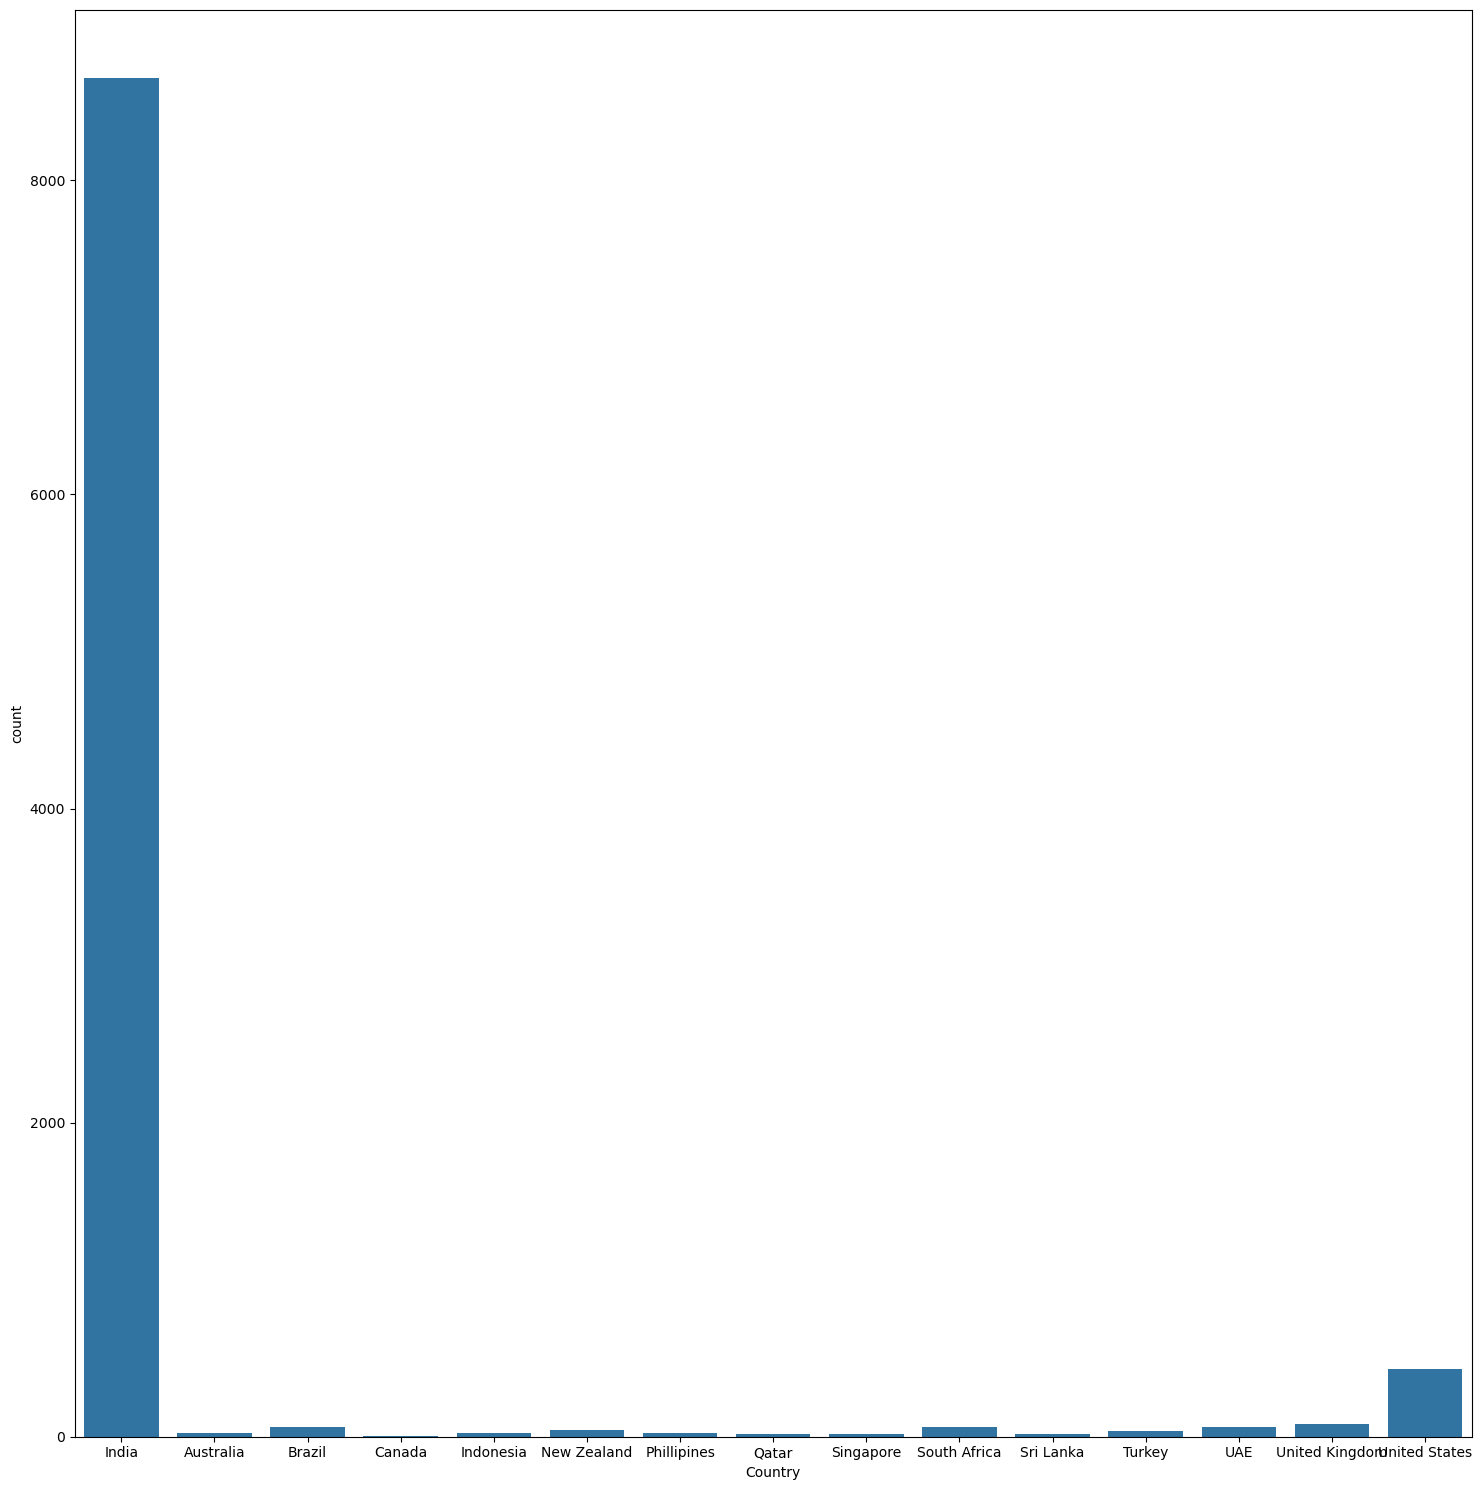

In [79]:
plt.figure(figsize=(15,15))
sns.countplot(zomatorestdf,x='Country')
plt.tight_layout()

The output from the countplot shows that the country India has more restaurants compared to other countries.

# Histplot for Restaurant ID column in the dataset

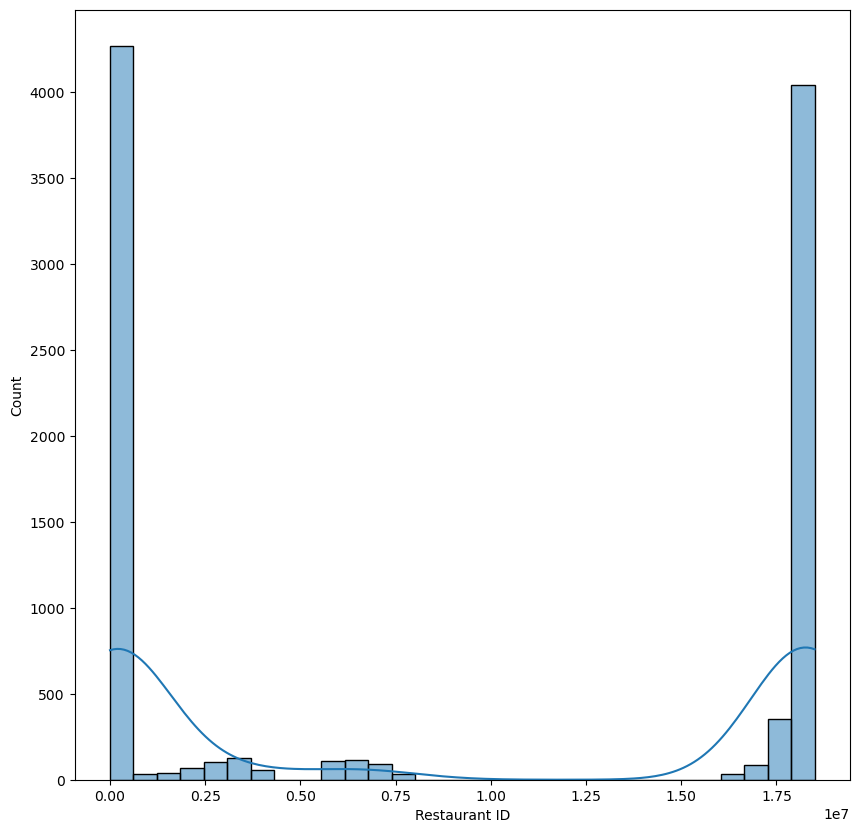

In [58]:
plt.figure(figsize=(10,10))
sns.histplot(zomatorestdf['Restaurant ID'],bins=30,kde=True)
plt.show()

# Countplot for City column in the dataset

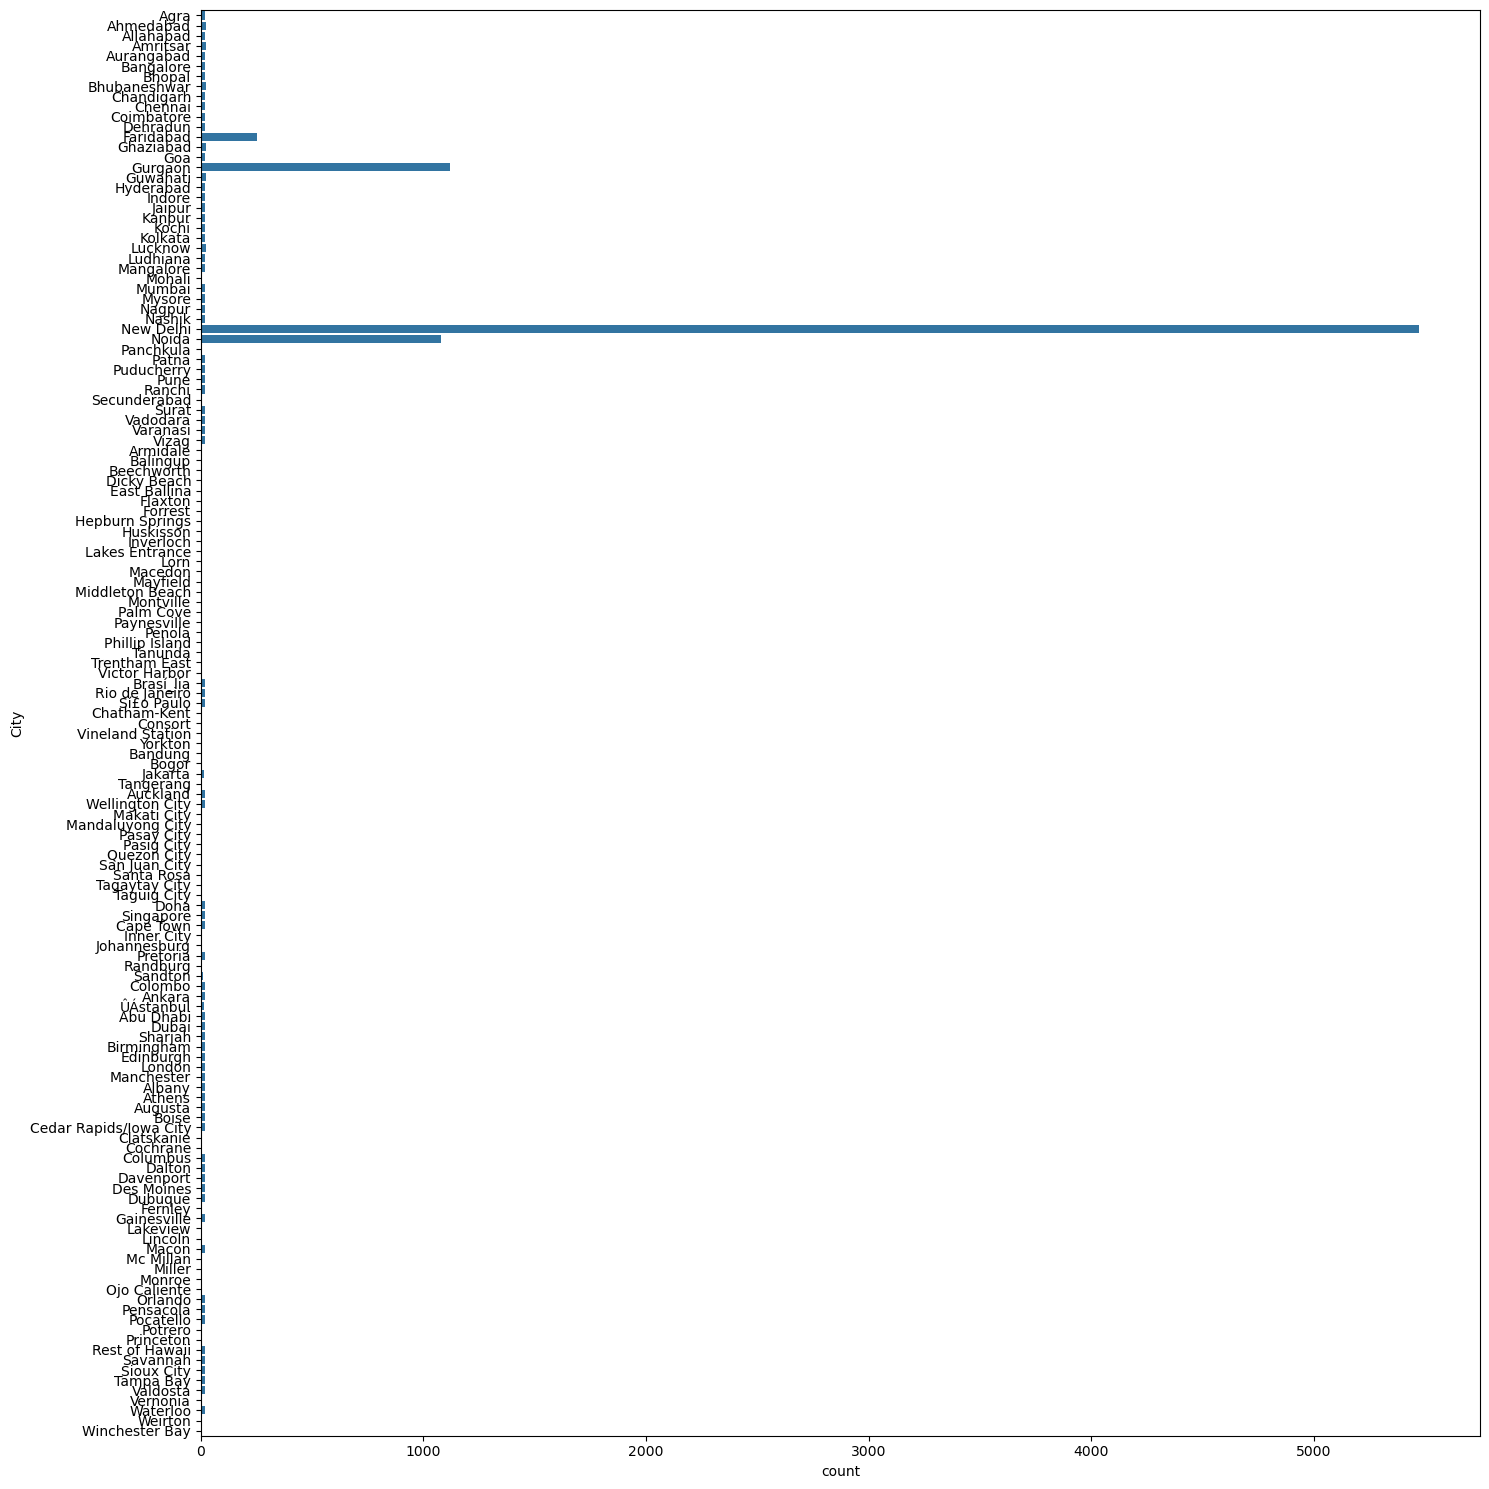

In [60]:
plt.figure(figsize=(15,15))
sns.countplot(zomatorestdf['City'])
plt.tight_layout()

The output from the above countplot shows that the city New Delhi has higher count for restaurants.

# Histplot for Latitude column in the dataset

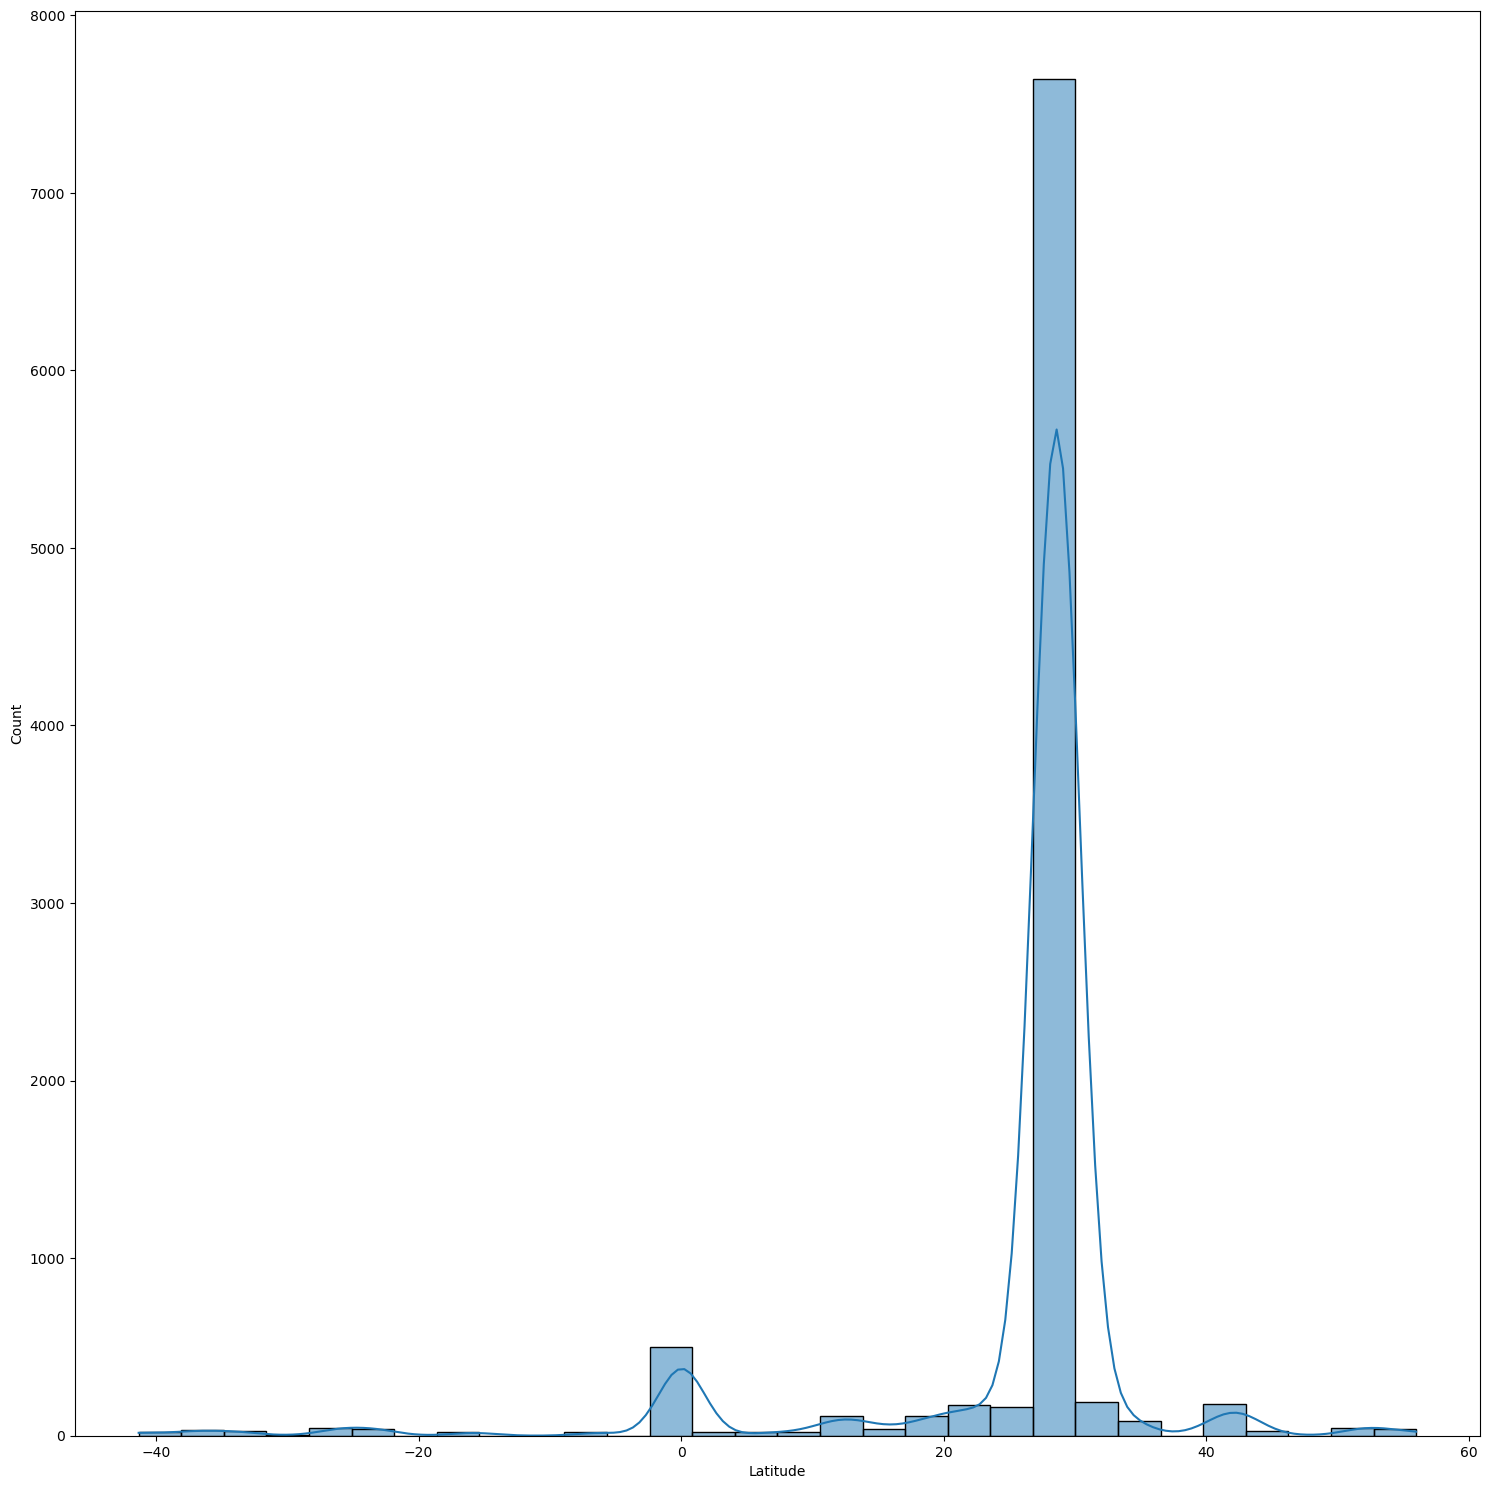

In [62]:
plt.figure(figsize=(15,15))
sns.histplot(zomatorestdf['Latitude'],bins=30,kde=True)
plt.tight_layout()

The output from the histplot shows that the higher peak value between 20 and 40 latitude location have more restaurants

# Histplot for Longitude column in the dataset

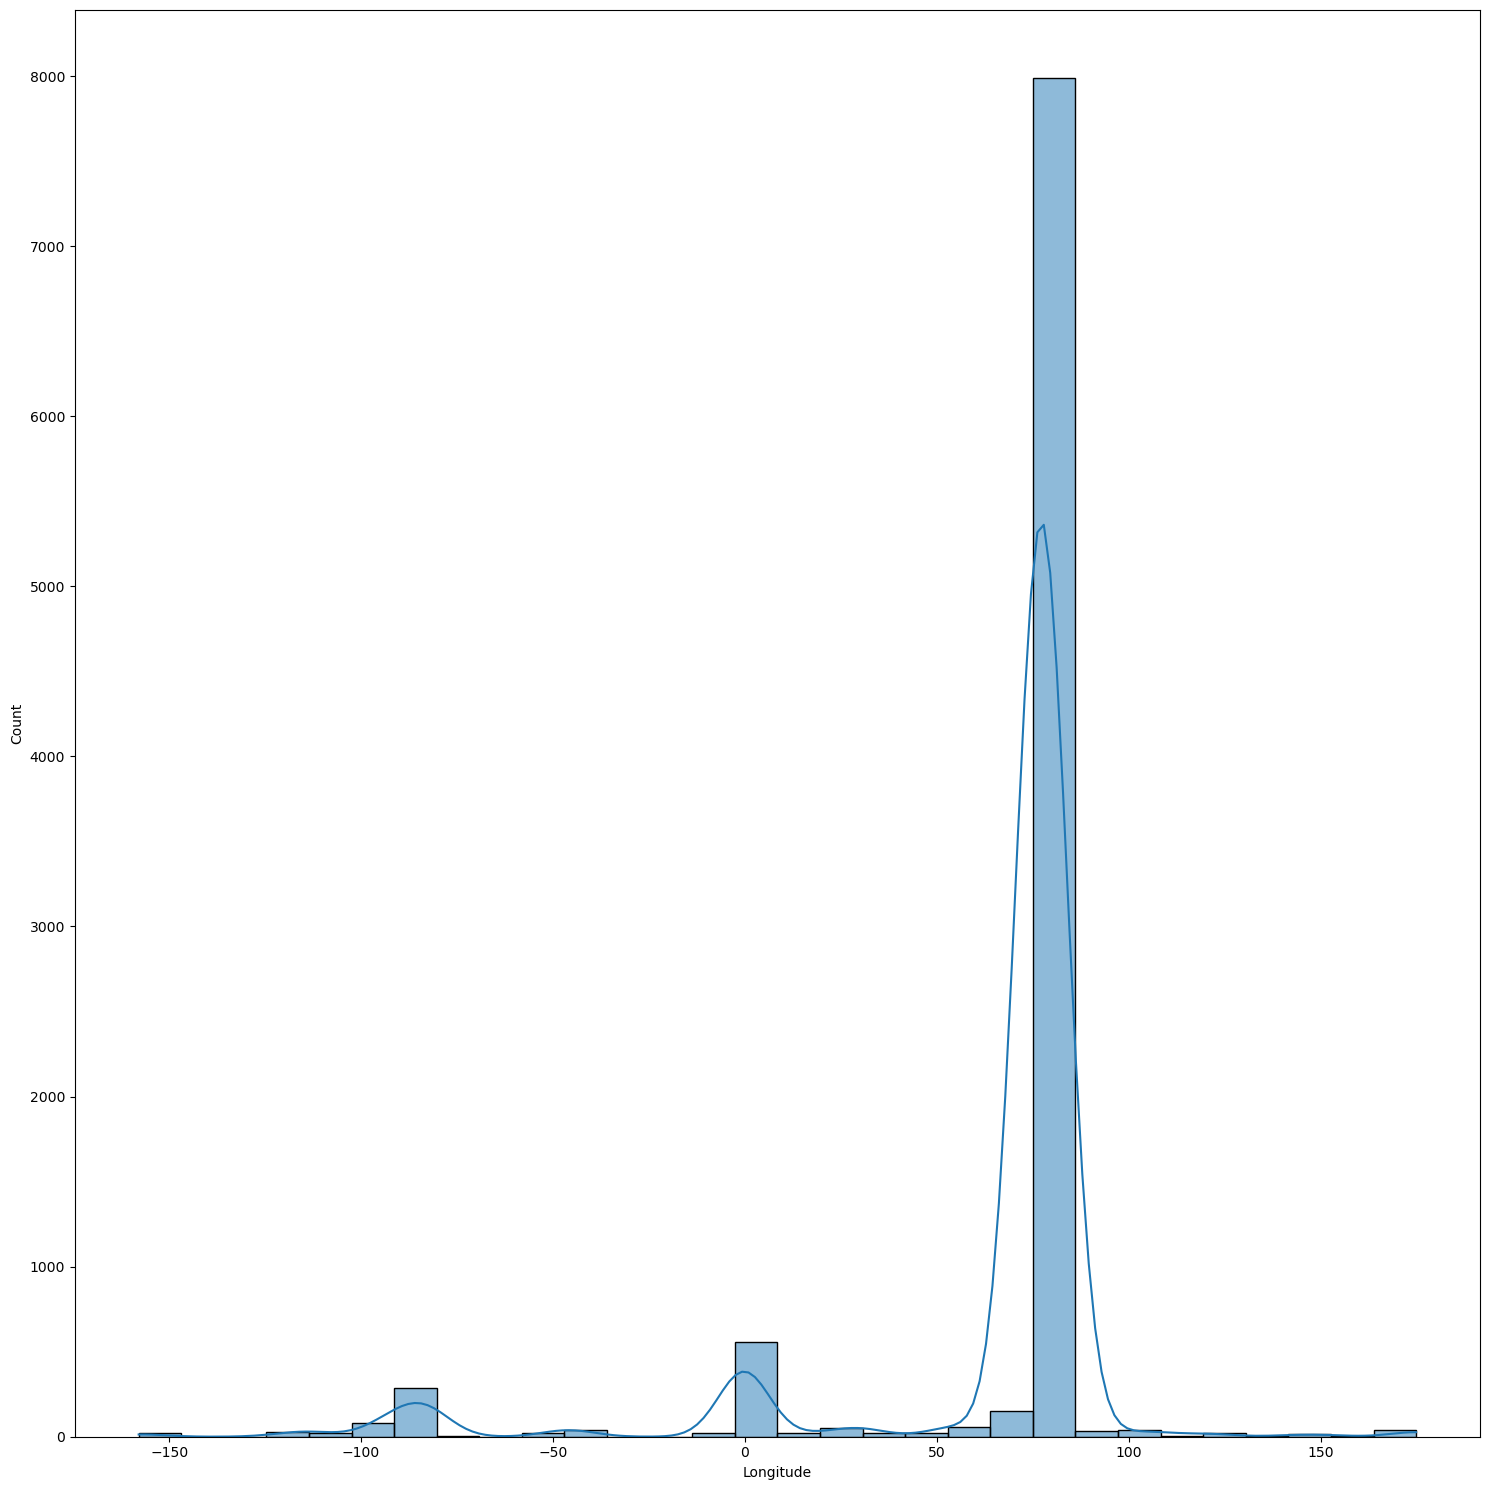

In [64]:
plt.figure(figsize=(15,15))
sns.histplot(zomatorestdf['Longitude'],bins=30,kde=True)
plt.tight_layout()

The output from the histplot shows that the higher peak value between 50 and 100 of longitude location have more restaurants

# Countplot for Average cost of two column

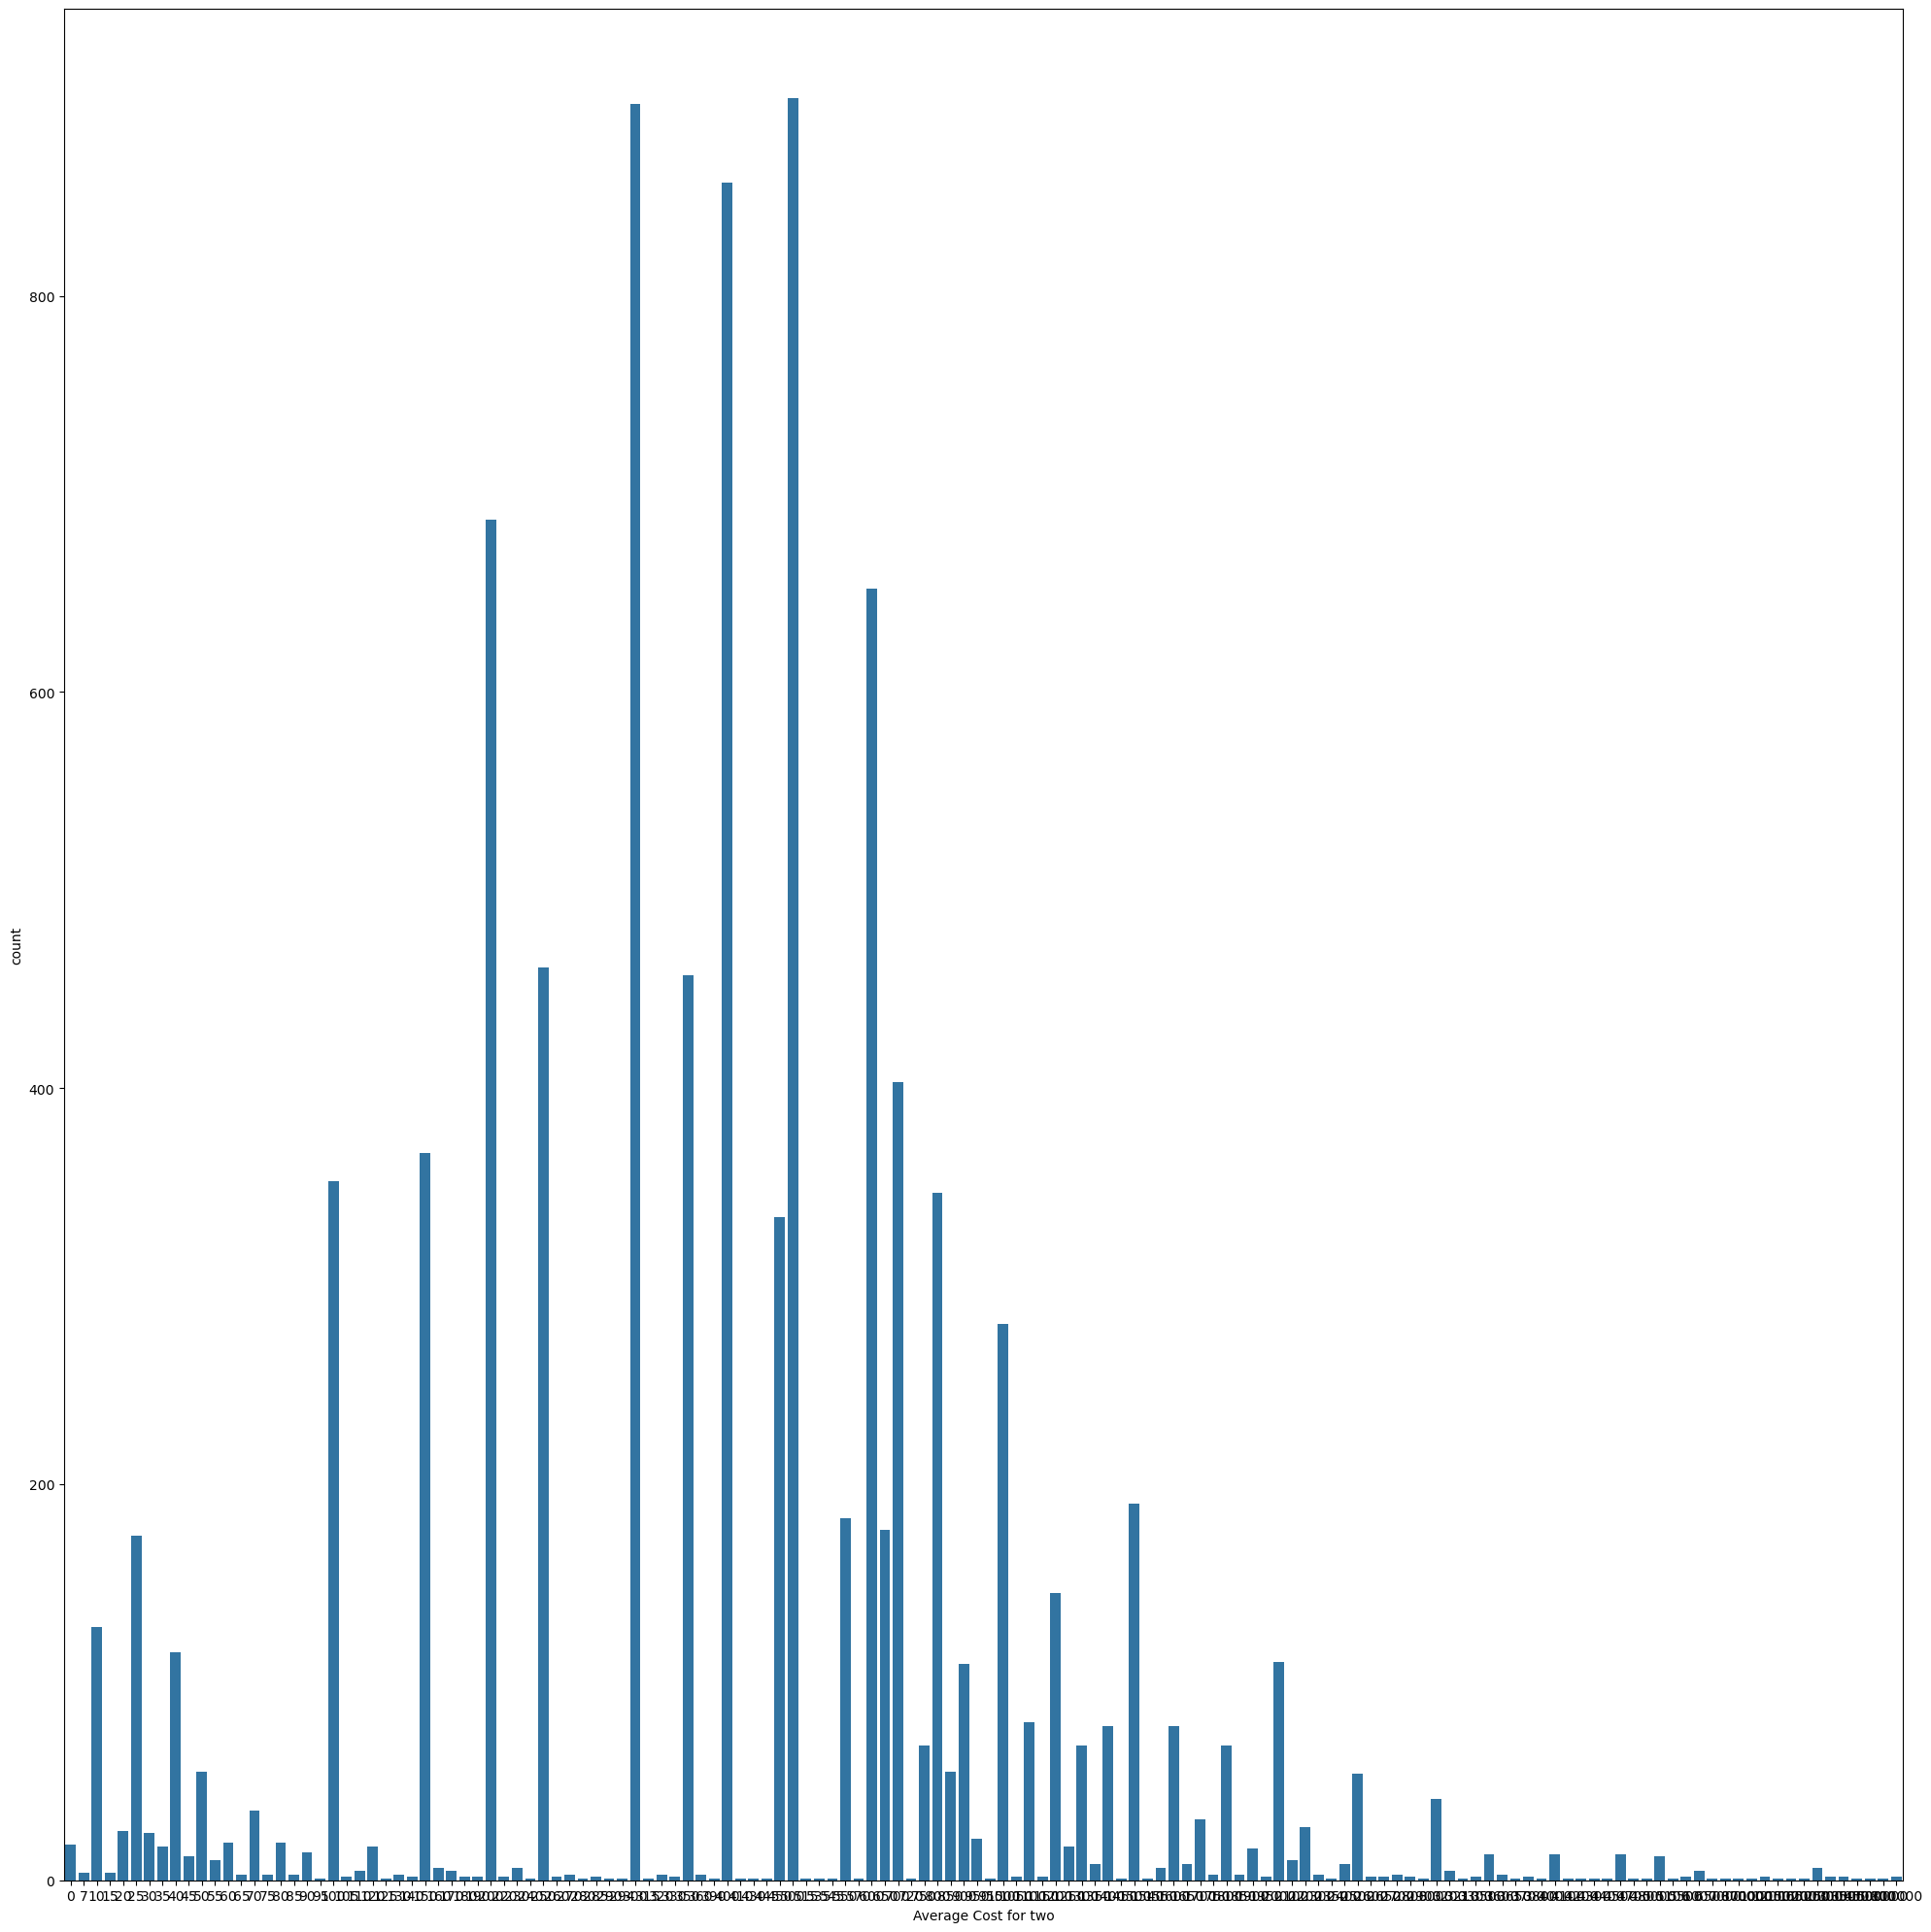

In [66]:
plt.figure(figsize=(20,20))
sns.countplot(zomatorestdf,x='Average Cost for two')
plt.tight_layout()

# Countplot for Currency column

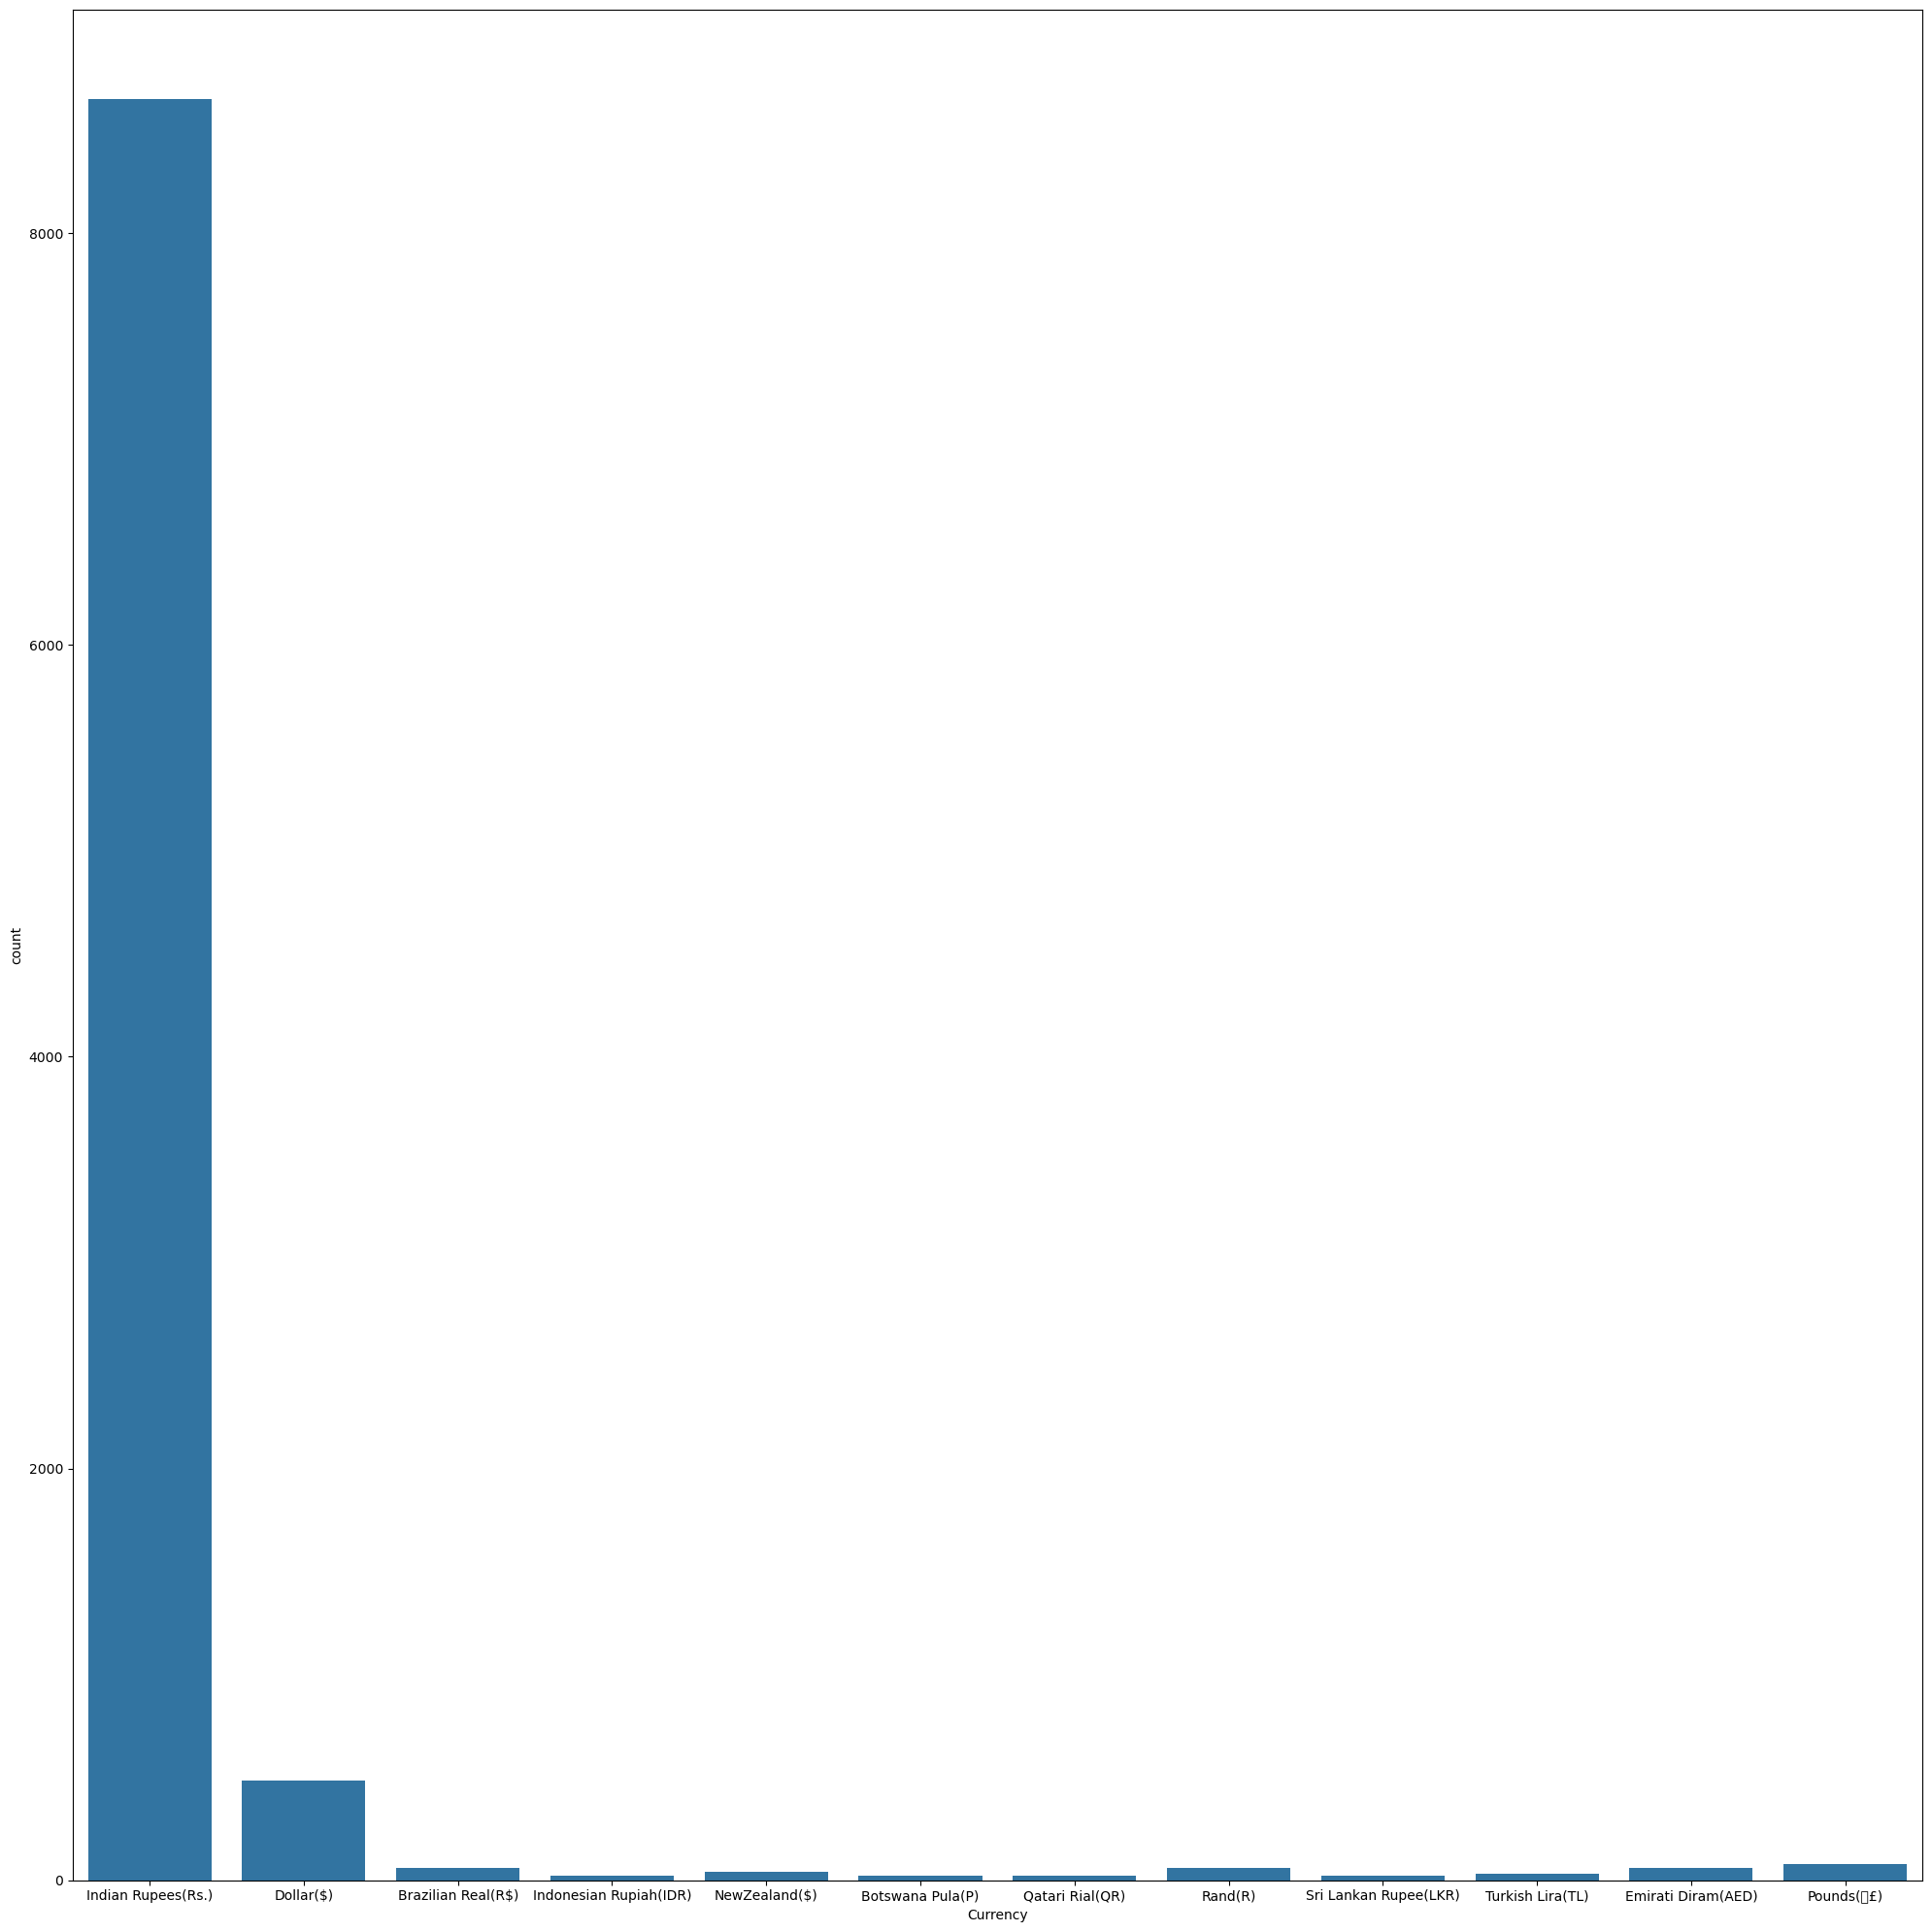

In [68]:
plt.figure(figsize=(20,20))
sns.countplot(zomatorestdf,x='Currency')
plt.tight_layout()

The countplot for currency column shows that Indian Rupees have higher count.

# Countplot to show the table booking available or not in the restaurant

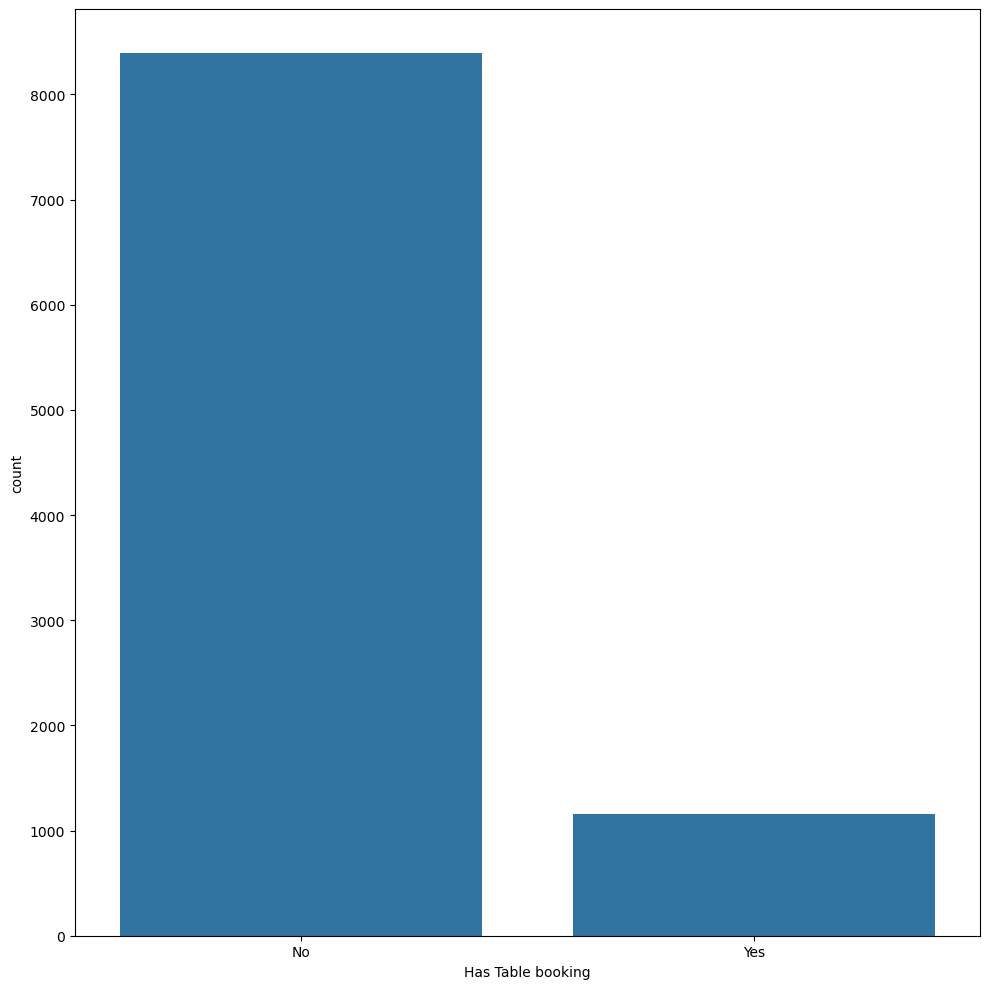

In [70]:
plt.figure(figsize=(10,10))
sns.countplot(zomatorestdf,x='Has Table booking')
plt.tight_layout()

The output from the countplot shows that many restaurants are not provided with table booking option and less number of restaurants with the value ranges from 0 to 1400 are provided with the table booking option.

# Countplot to show the the restuarant accept or decline the online delivery

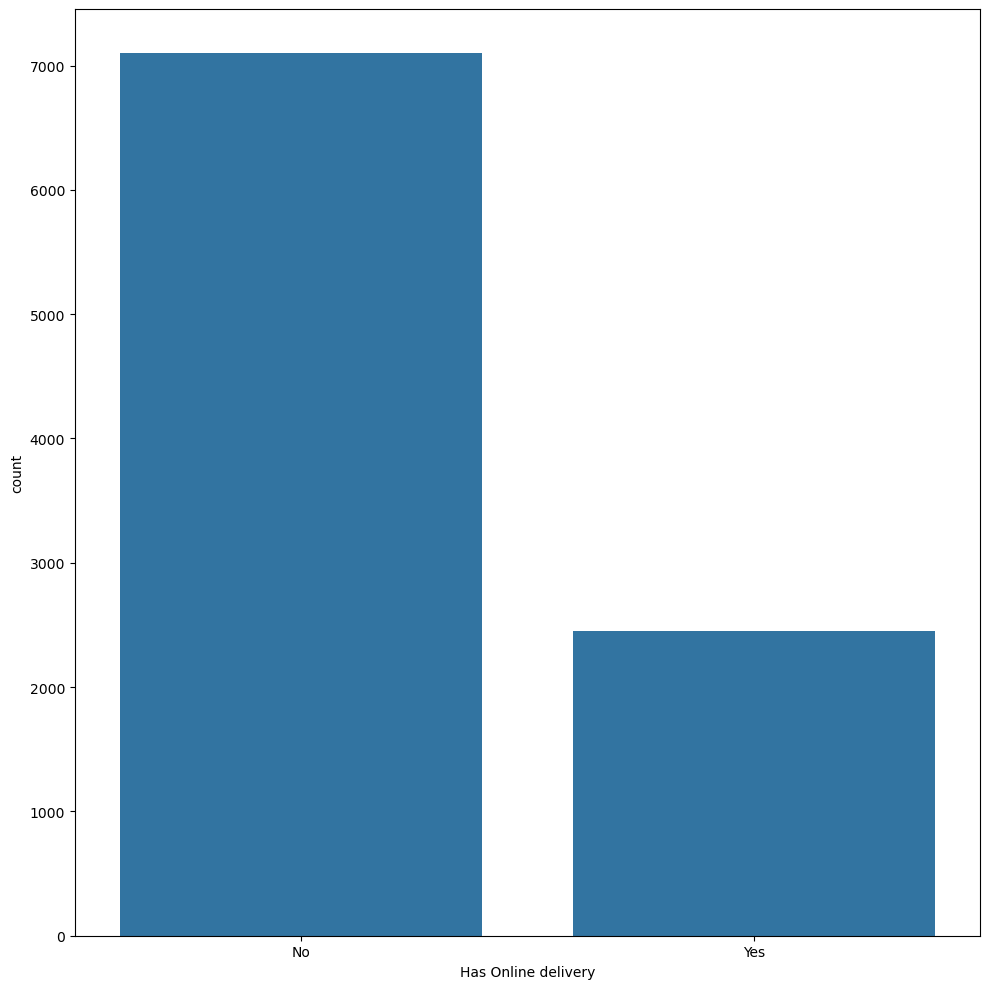

In [72]:
plt.figure(figsize=(10,10))
sns.countplot(zomatorestdf,x='Has Online delivery')
plt.tight_layout()

The output from the countplot shows that many restaurants are not provided with the online food delivery option and less number of restaurants with the value ranges from 0 to 2500 has online food delivery.

# Countplot to show the order is delivering now or not from the restaurant

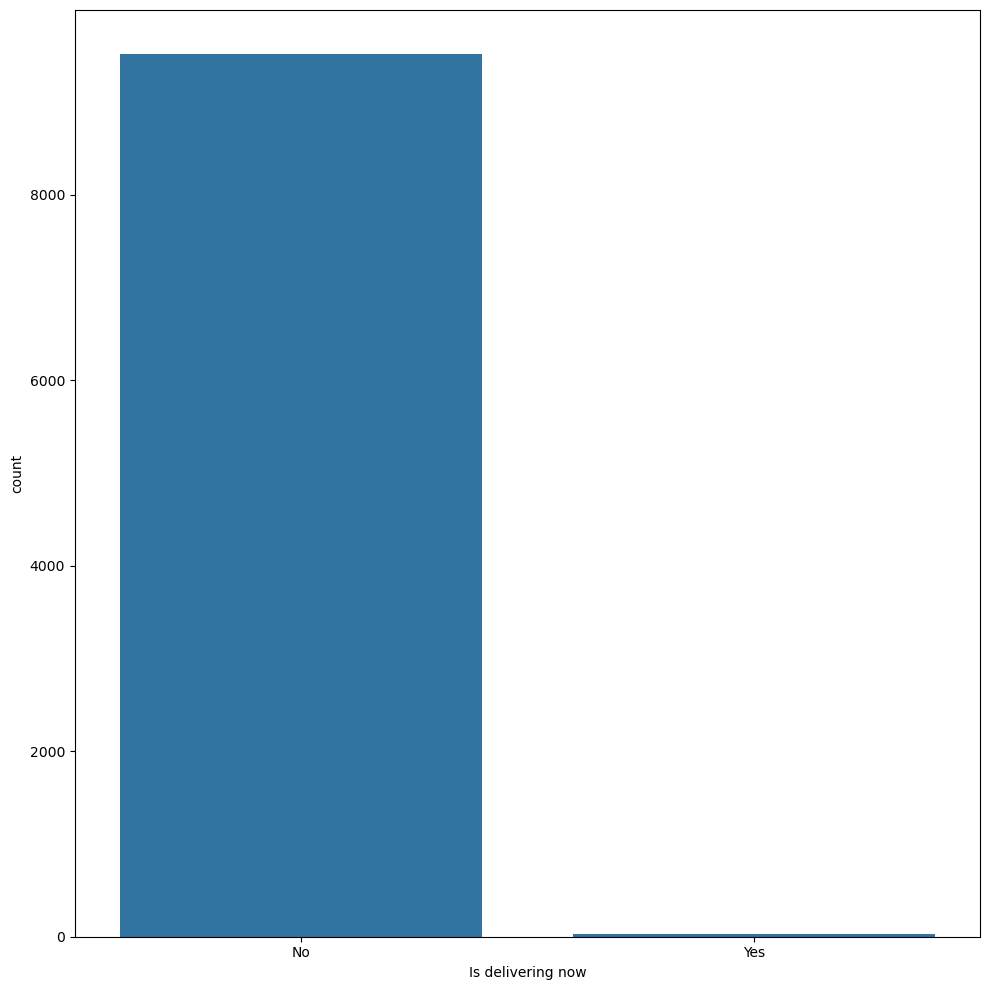

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(zomatorestdf,x='Is delivering now')
plt.tight_layout()

The output from the countplot shows that many restaurants are not provided delierving now option and less number of restaurants with the value ranges from 0 to 10 are provided with the delivery now option.

# Countplot to show switch to order menu

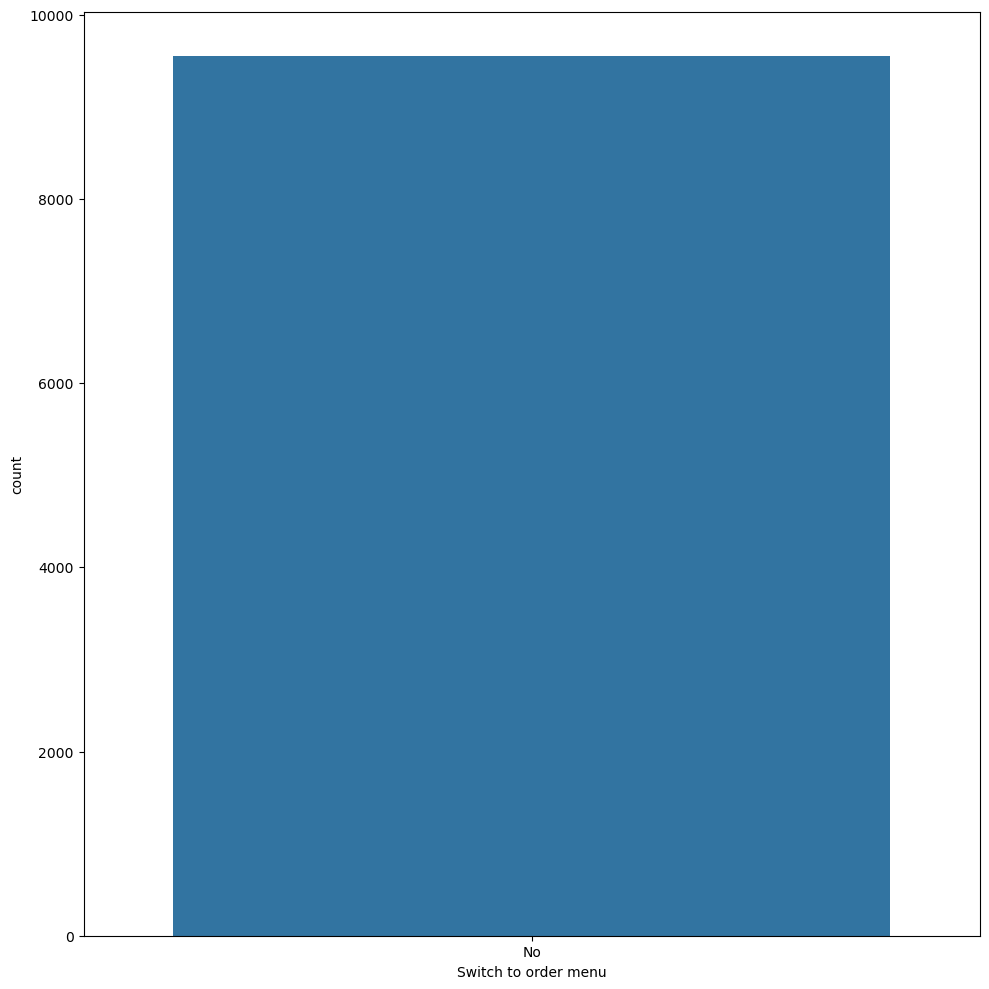

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(zomatorestdf,x='Switch to order menu')
plt.tight_layout()

# Countplot to show the price range of food in the restaurant

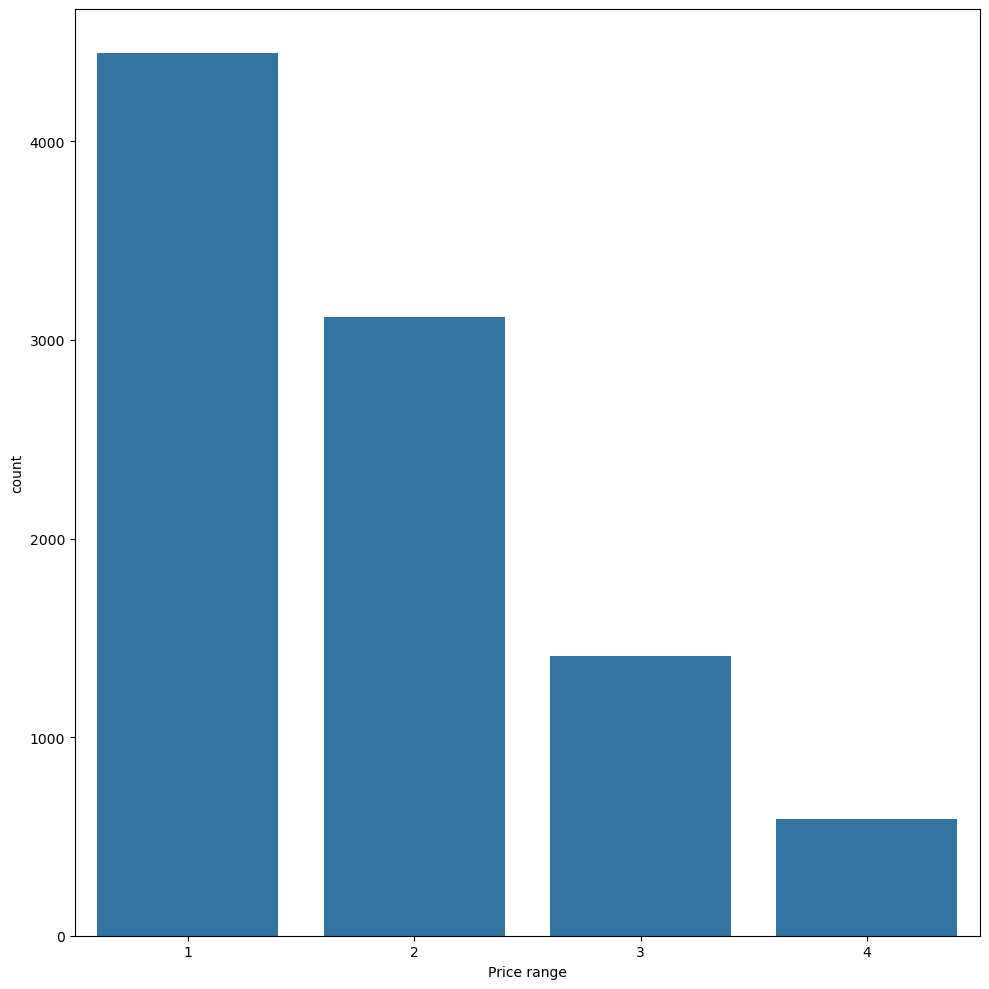

In [78]:
plt.figure(figsize=(10,10))
sns.countplot(zomatorestdf,x='Price range')
plt.tight_layout()

It is clear from the above output that the price range value of 1 has higher count.

# Countplot for Aggregate rating column

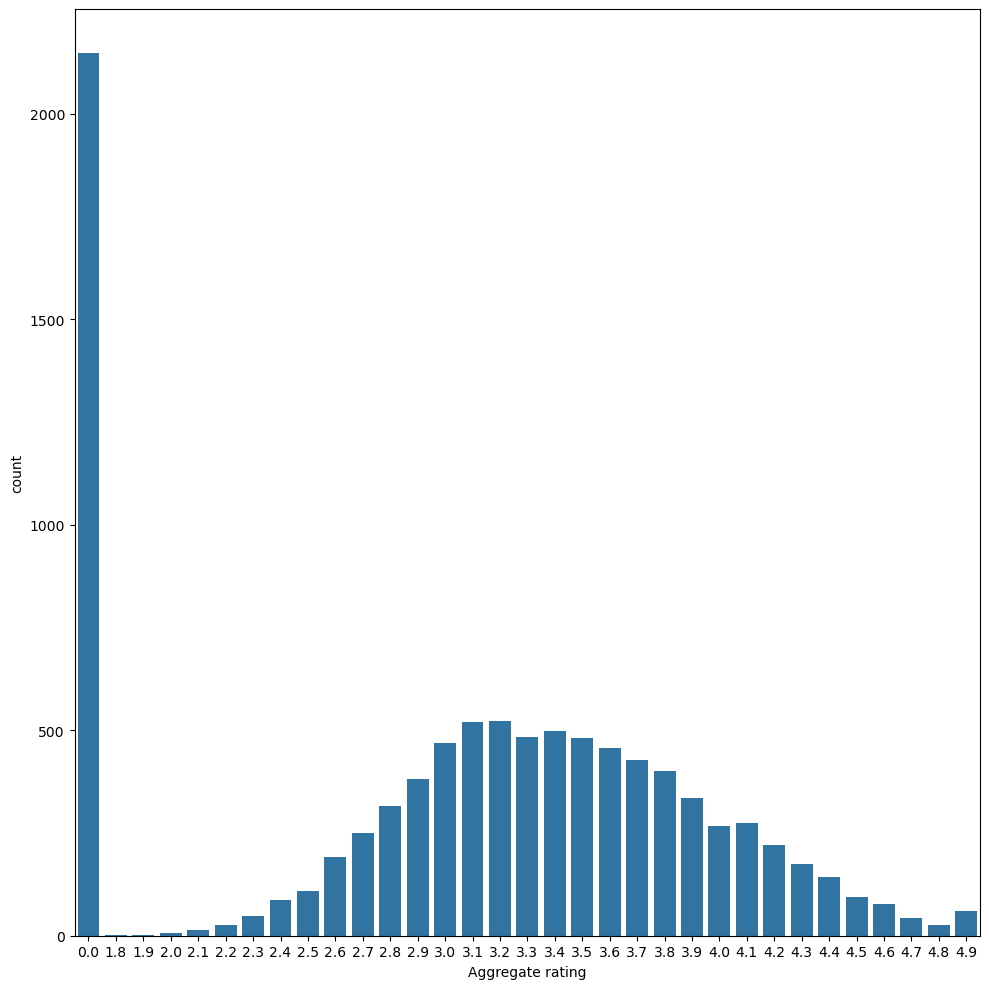

In [80]:
plt.figure(figsize=(10,10))
sns.countplot(zomatorestdf,x='Aggregate rating')
plt.tight_layout()

# Countplot for Rating text column

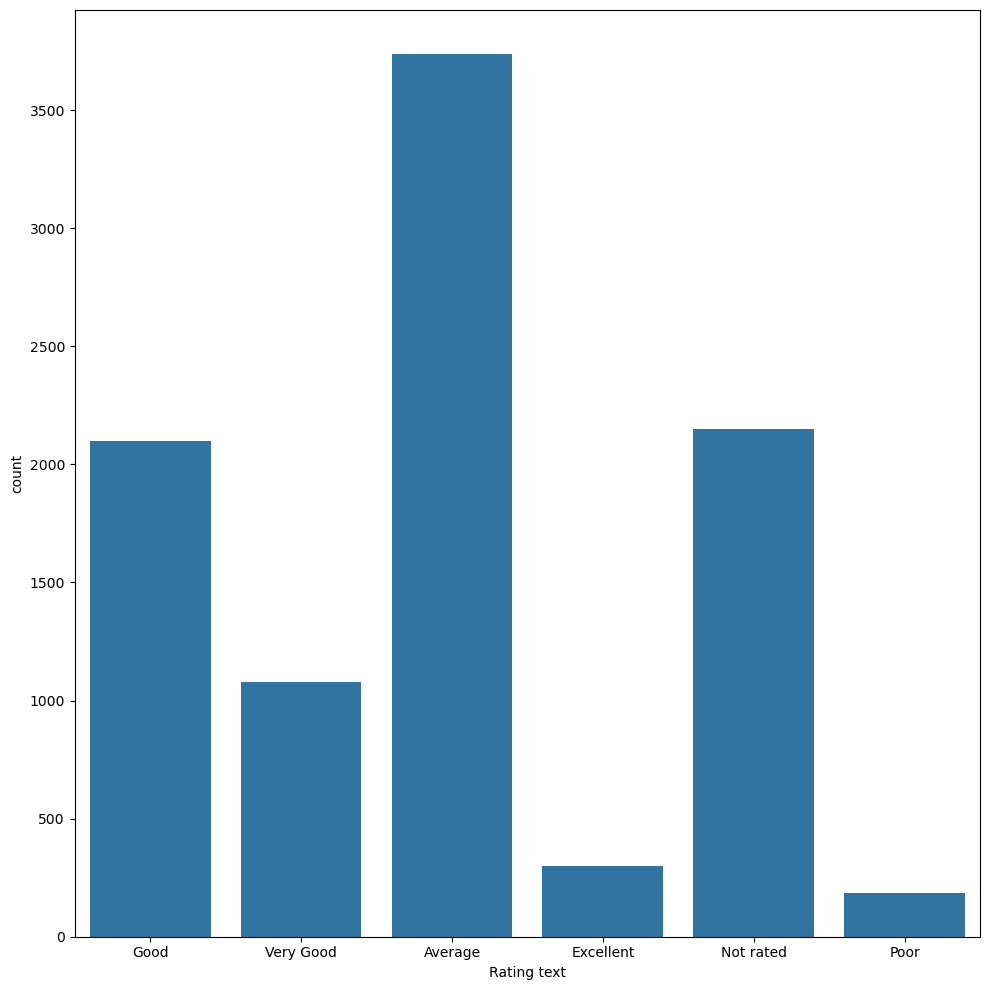

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(zomatorestdf,x='Rating text')
plt.tight_layout()

It is clear from the above output that many people have rated average for the food in the restaurant

# Histplot for Votes column

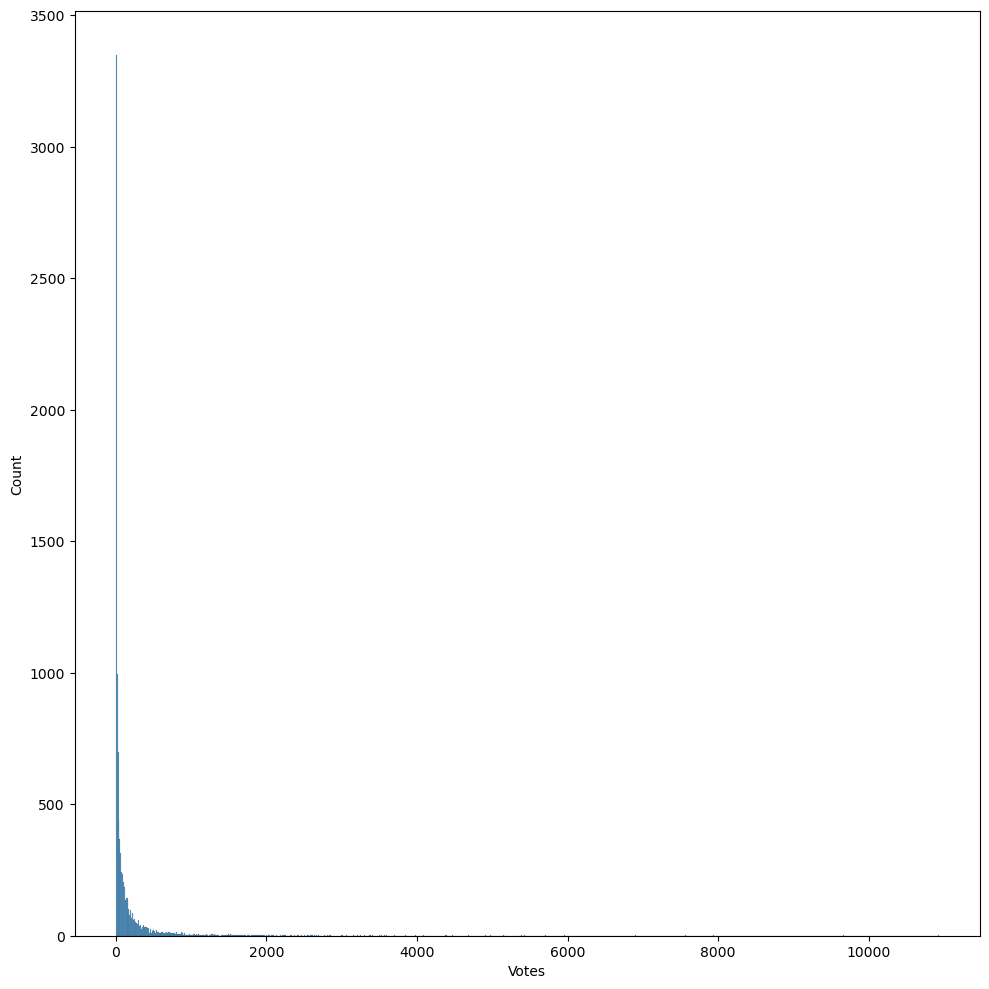

In [84]:
plt.figure(figsize=(10,10))
sns.histplot(zomatorestdf['Votes'])
plt.tight_layout()

# Bivariate Analysis

# Relationship between Aggregate rating and Price range for Rating text using Barplot

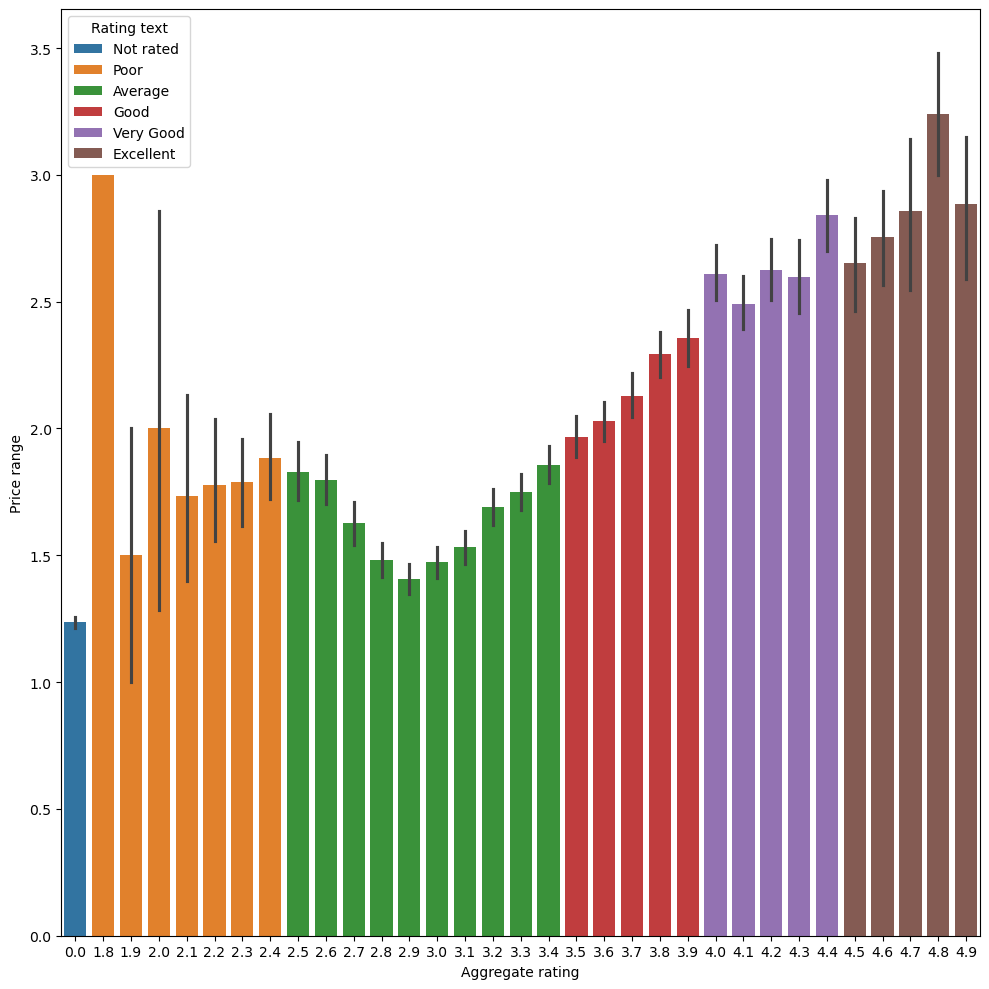

In [87]:
plt.figure(figsize=(10,10))
sns.barplot(zomatorestdf,x='Aggregate rating',y='Price range',hue='Rating text')
plt.tight_layout()

# Relationship between Restaurant ID and Average Cost for two people in the restaurant using scatterplot

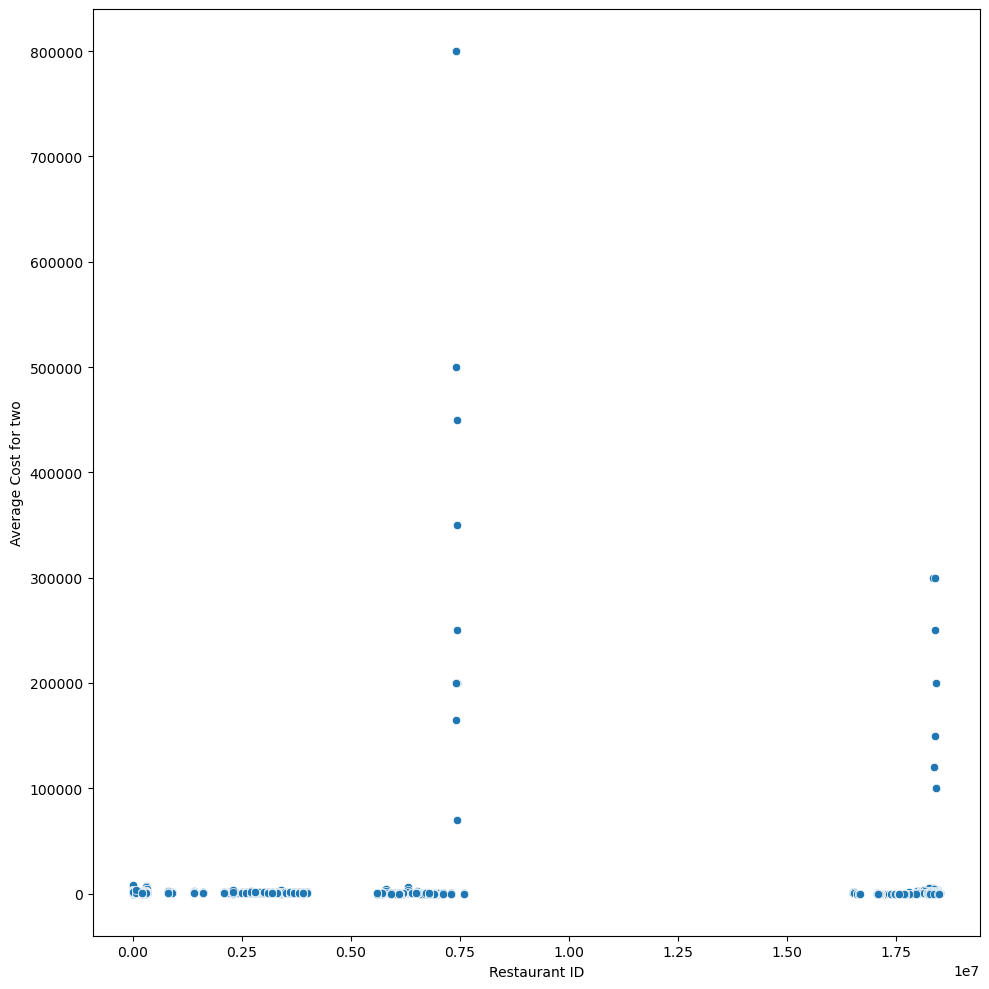

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(zomatorestdf,x='Restaurant ID',y='Average Cost for two')
plt.tight_layout()

# Relationship between Price range of food and Average Cost for two people in the restaurant using scatterplot

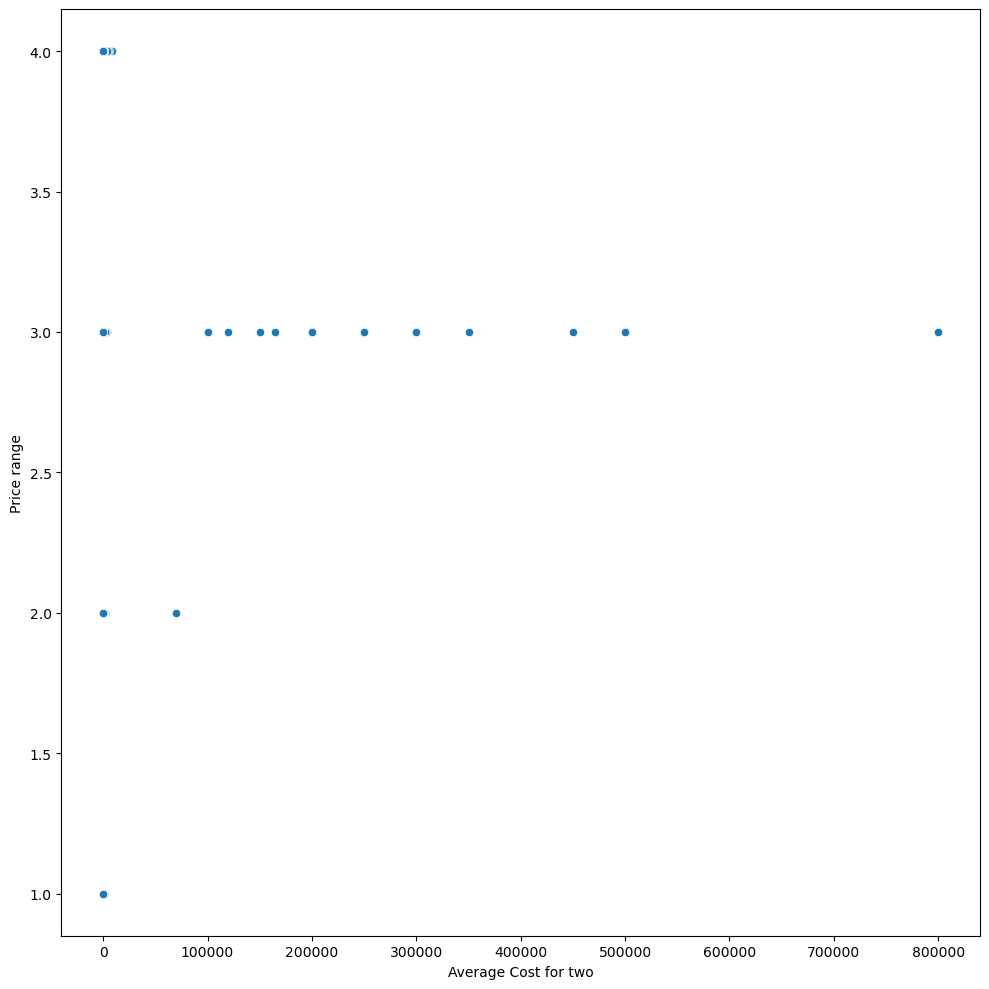

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(zomatorestdf,x='Average Cost for two',y='Price range')
plt.tight_layout()

# Relationship between Latitude and Longitude using scatterplot

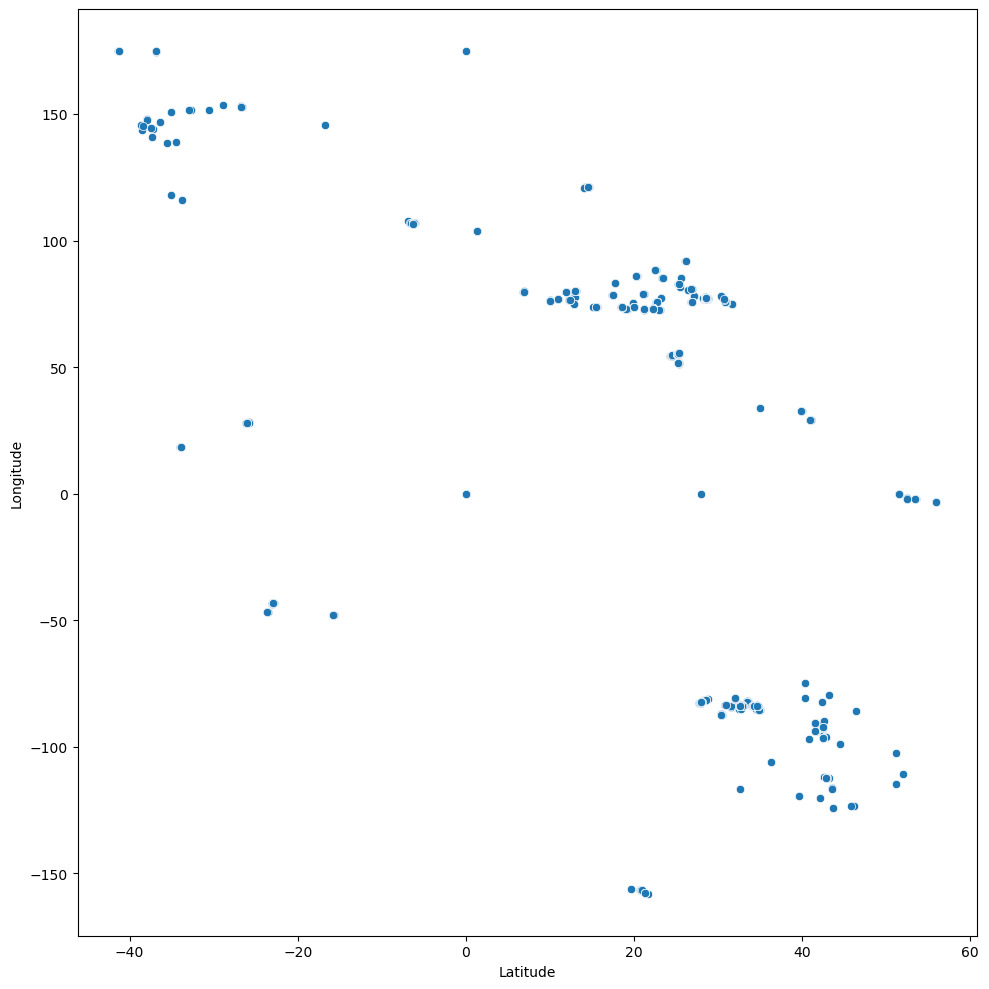

In [93]:
plt.figure(figsize=(10,10))
sns.scatterplot(zomatorestdf,x='Latitude',y='Longitude')
plt.tight_layout()

# Display the relationship between the Country and restaurant in the country that has table booking using seaborn countplot

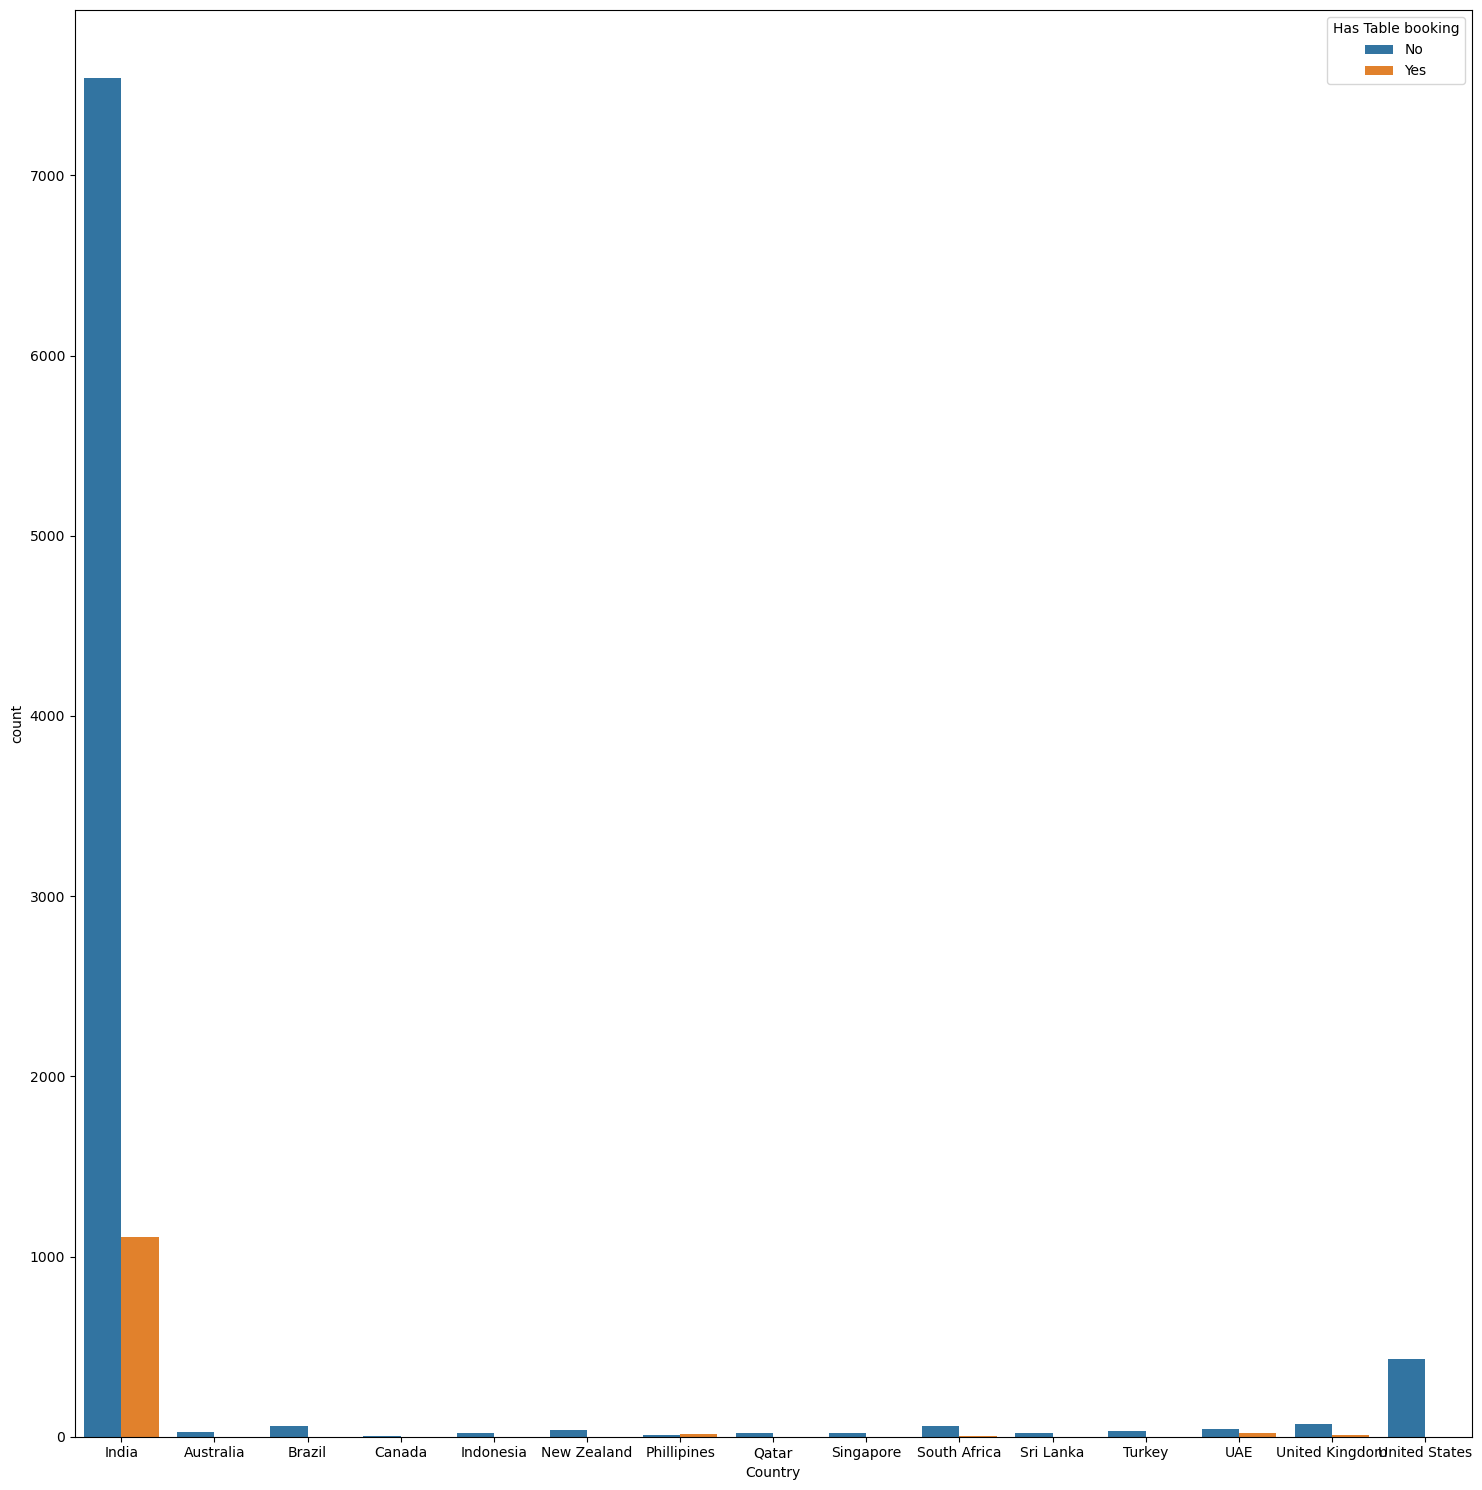

In [95]:
plt.figure(figsize=(15,15))
sns.countplot(zomatorestdf,x='Country',hue='Has Table booking')
plt.tight_layout()

# Display the relationship between the Country and restaurant in the country that has online delivery using seaborn countplot

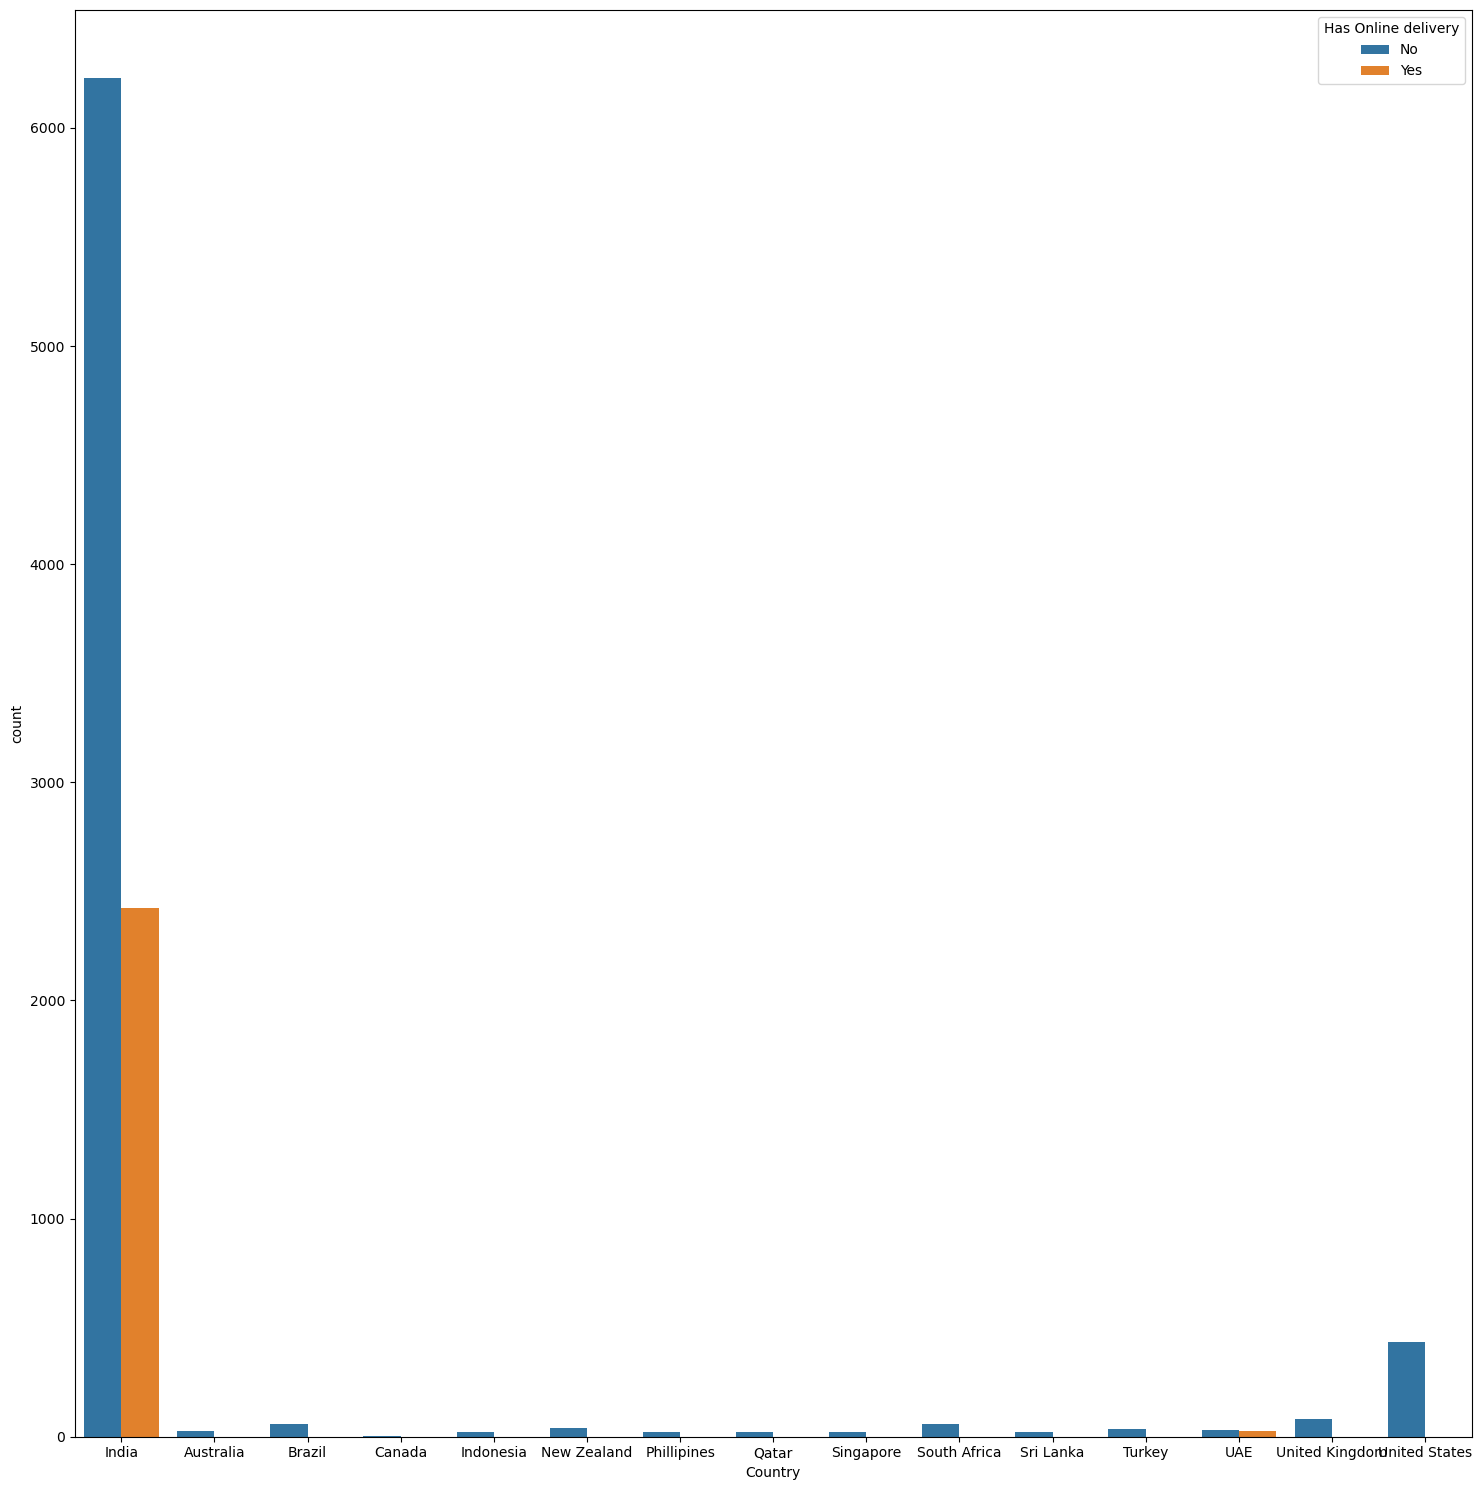

In [97]:
plt.figure(figsize=(15,15))
sns.countplot(zomatorestdf,x='Country',hue='Has Online delivery')
plt.tight_layout()

# Display the relationship between the Rating text and the country where the restaurant has table booking using seaborn barplot

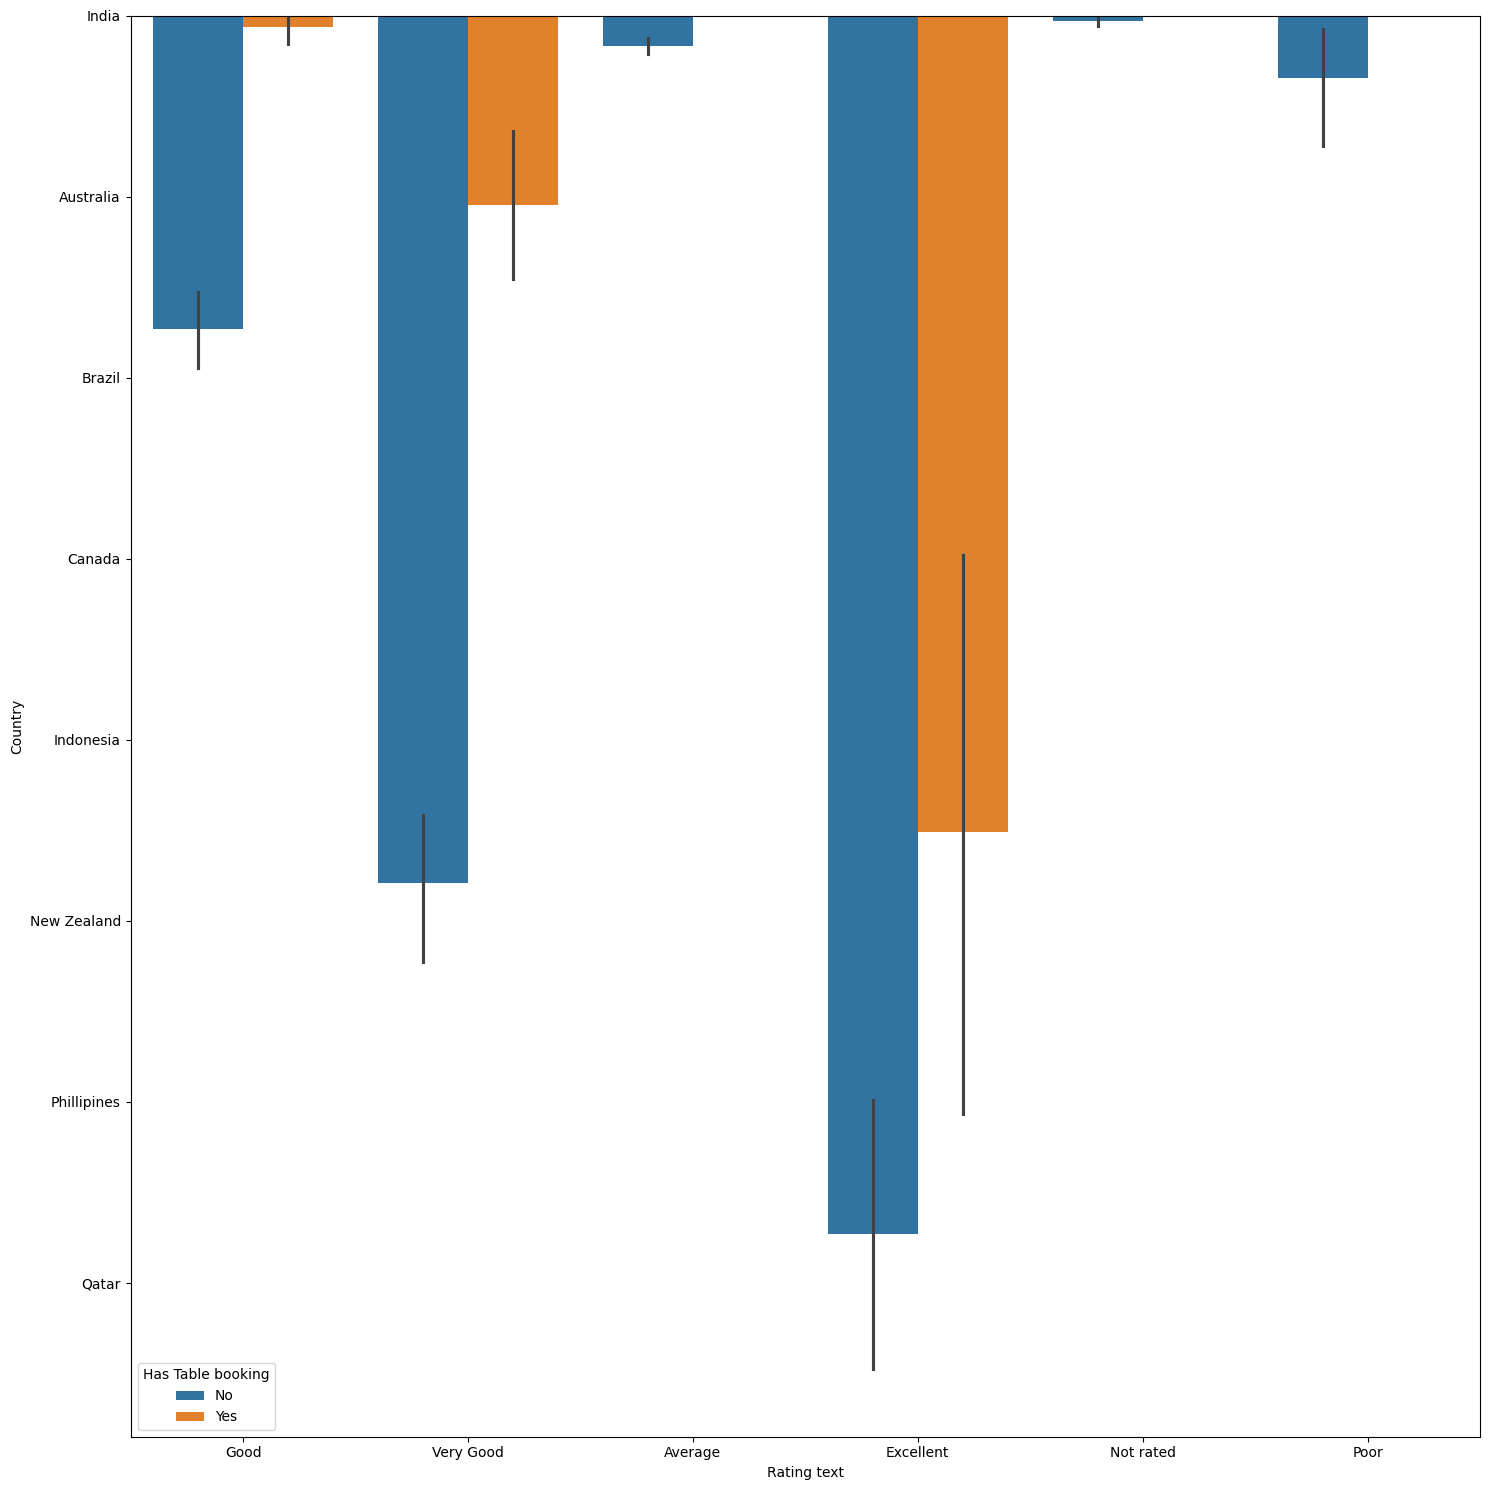

In [99]:
plt.figure(figsize=(15,15))
sns.barplot(zomatorestdf,x='Rating text',y='Country',hue='Has Table booking')
plt.tight_layout()

# Display the relationship between the Rating text and the average cost of two people in the restaurant using seaborn scatterplot

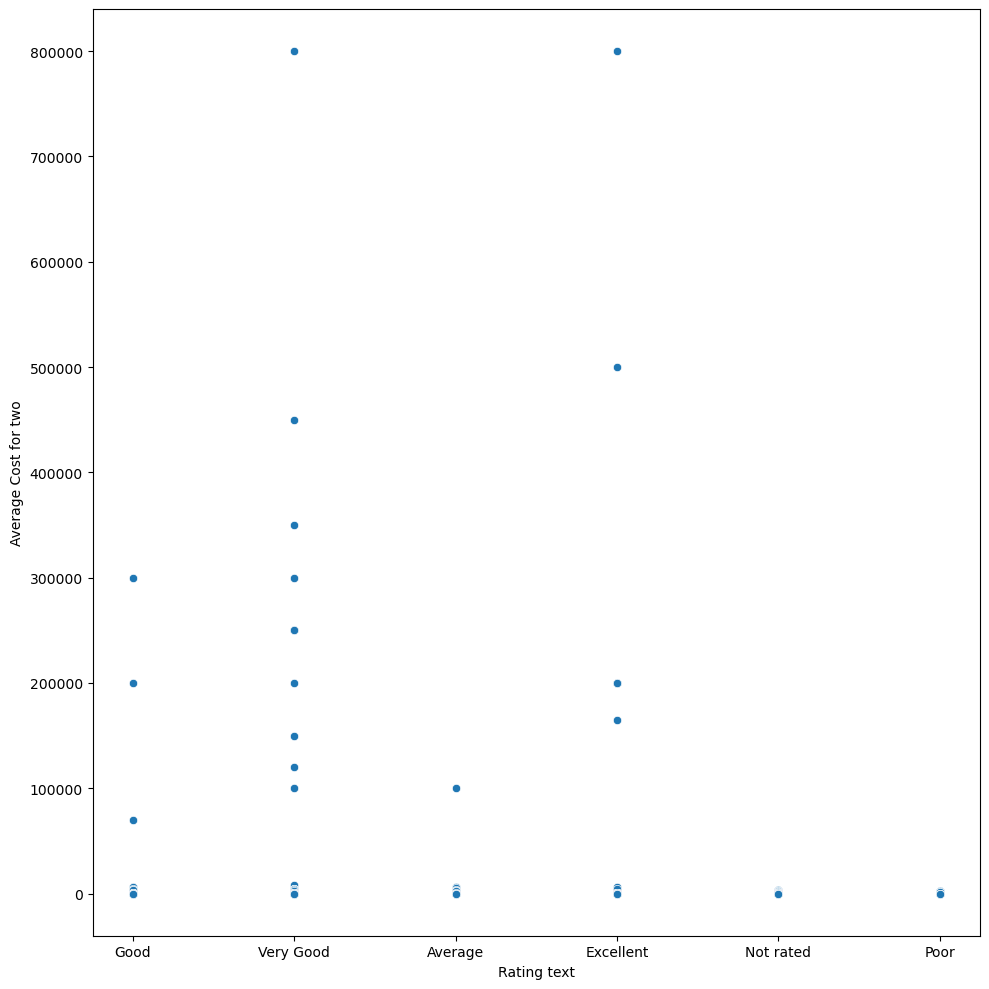

In [101]:
plt.figure(figsize=(10,10))
sns.scatterplot(zomatorestdf,x='Rating text',y='Average Cost for two')
plt.tight_layout()

# Display the relationship between the Aggregate rating and Votes using seaborn barplot

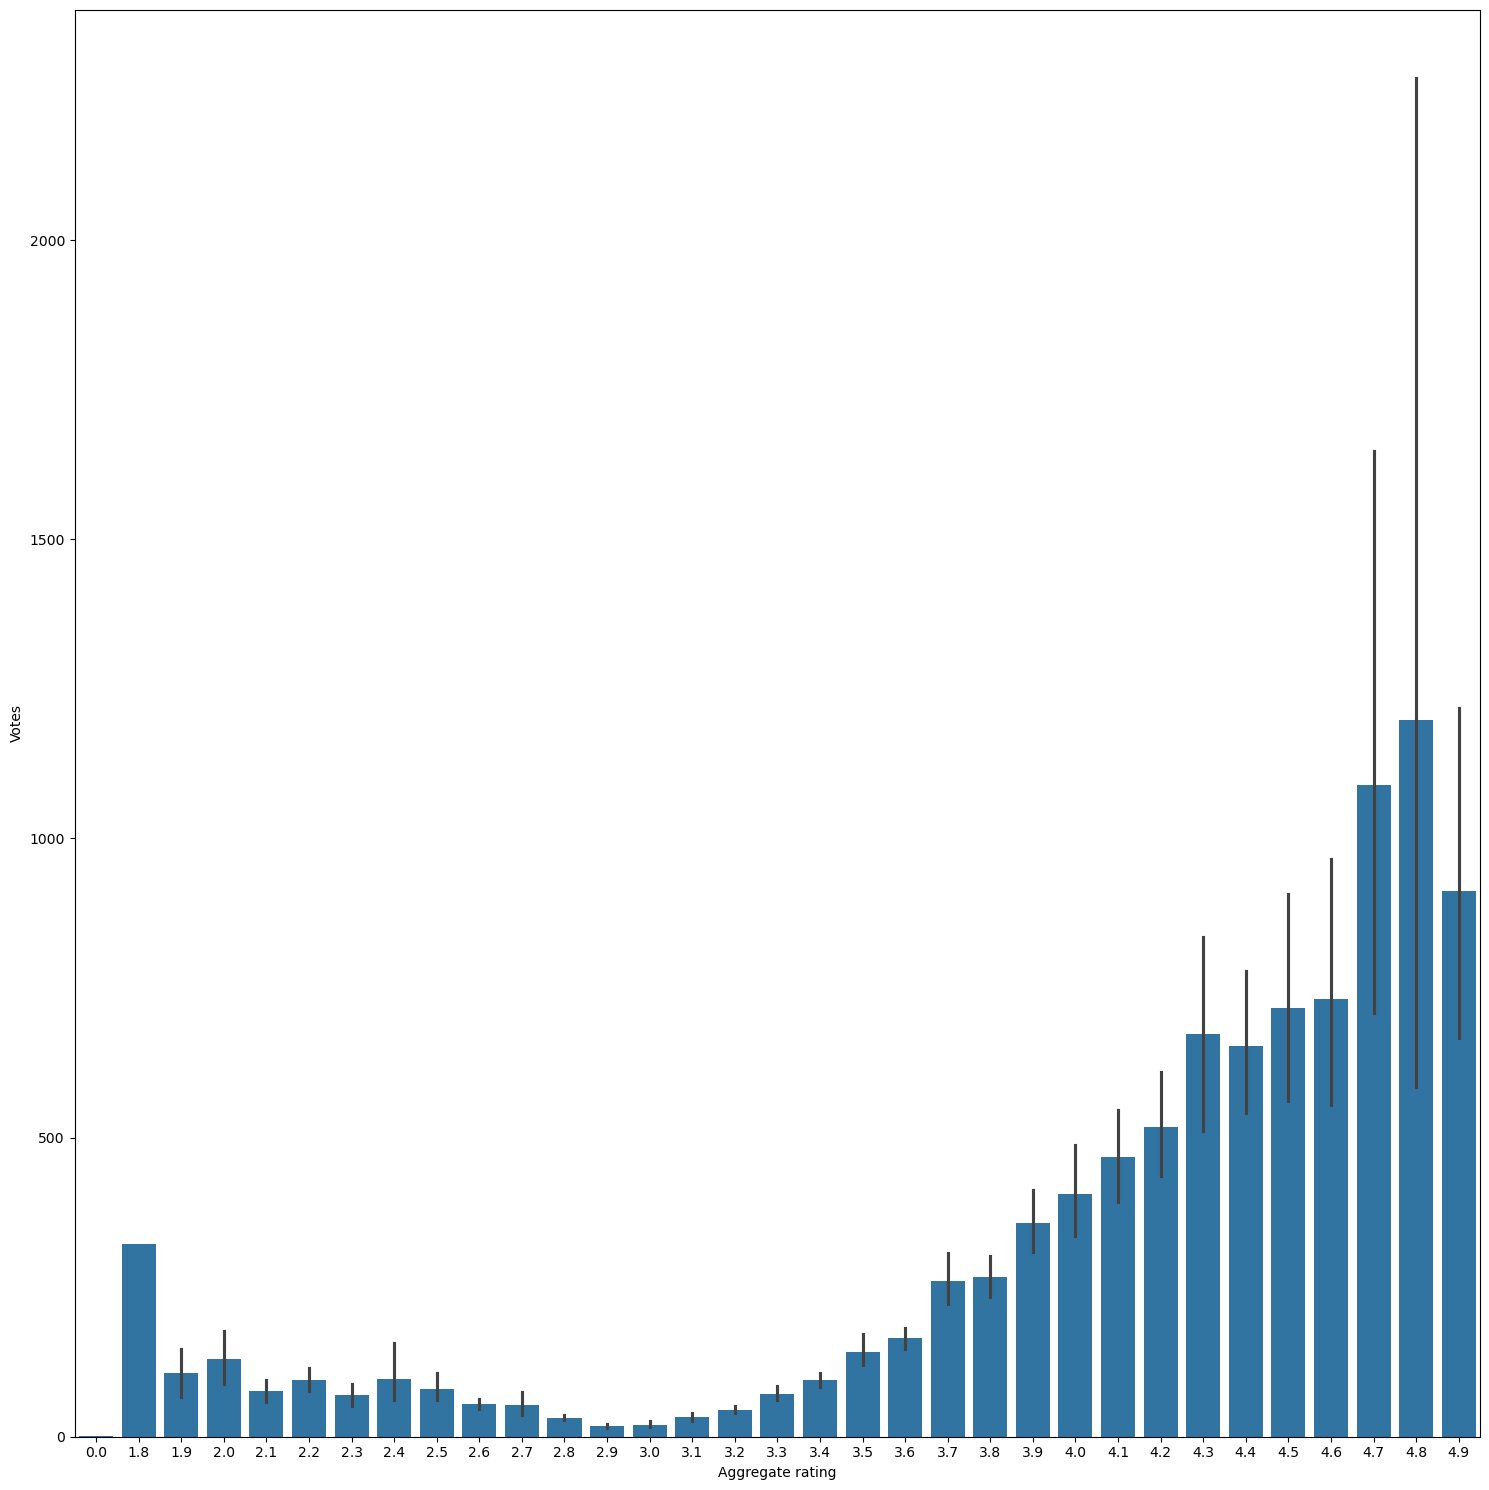

In [103]:
plt.figure(figsize=(15,15))
sns.barplot(zomatorestdf,x='Aggregate rating',y='Votes')
plt.tight_layout()

# Display the relationship between the Average cost of two people and Votes using seaborn scatterplot

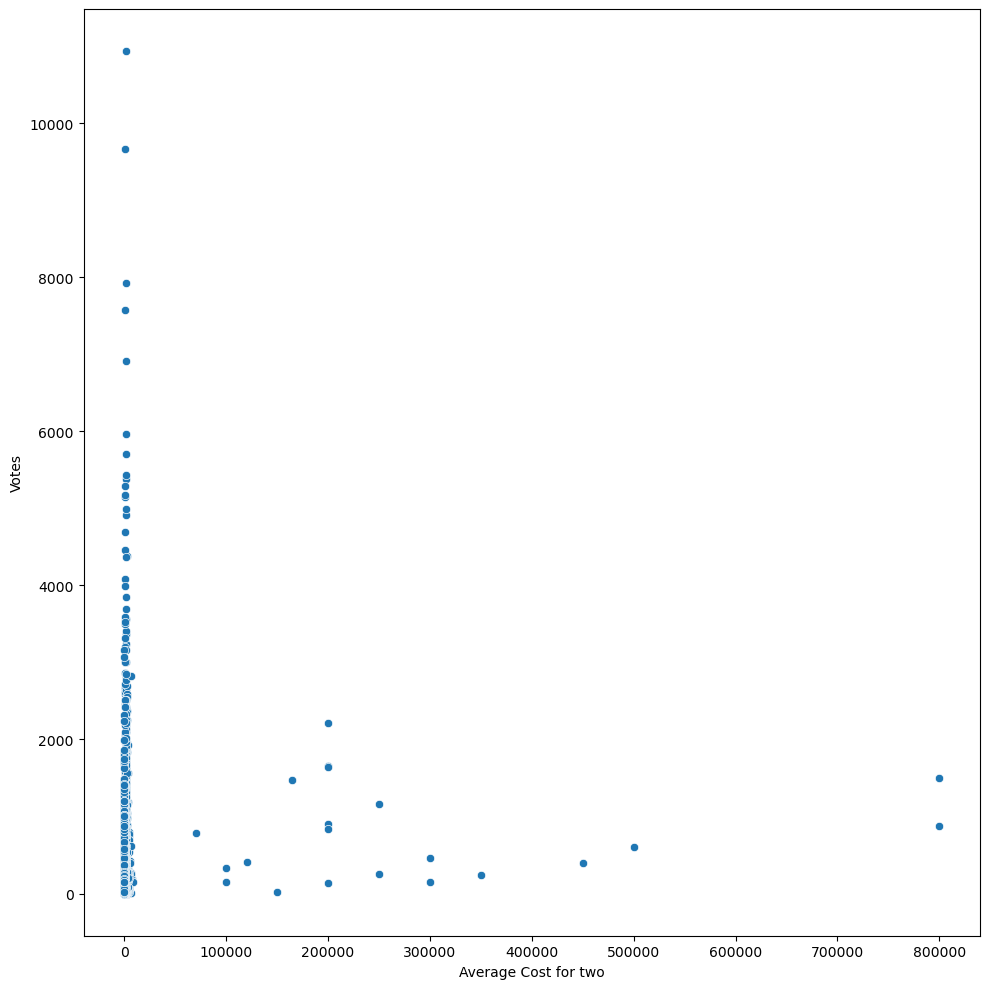

In [105]:
plt.figure(figsize=(10,10))
sns.scatterplot(zomatorestdf,x='Average Cost for two',y='Votes')
plt.tight_layout()

# Display the relationship between the Price range of the food and Votes using seaborn scatterplot

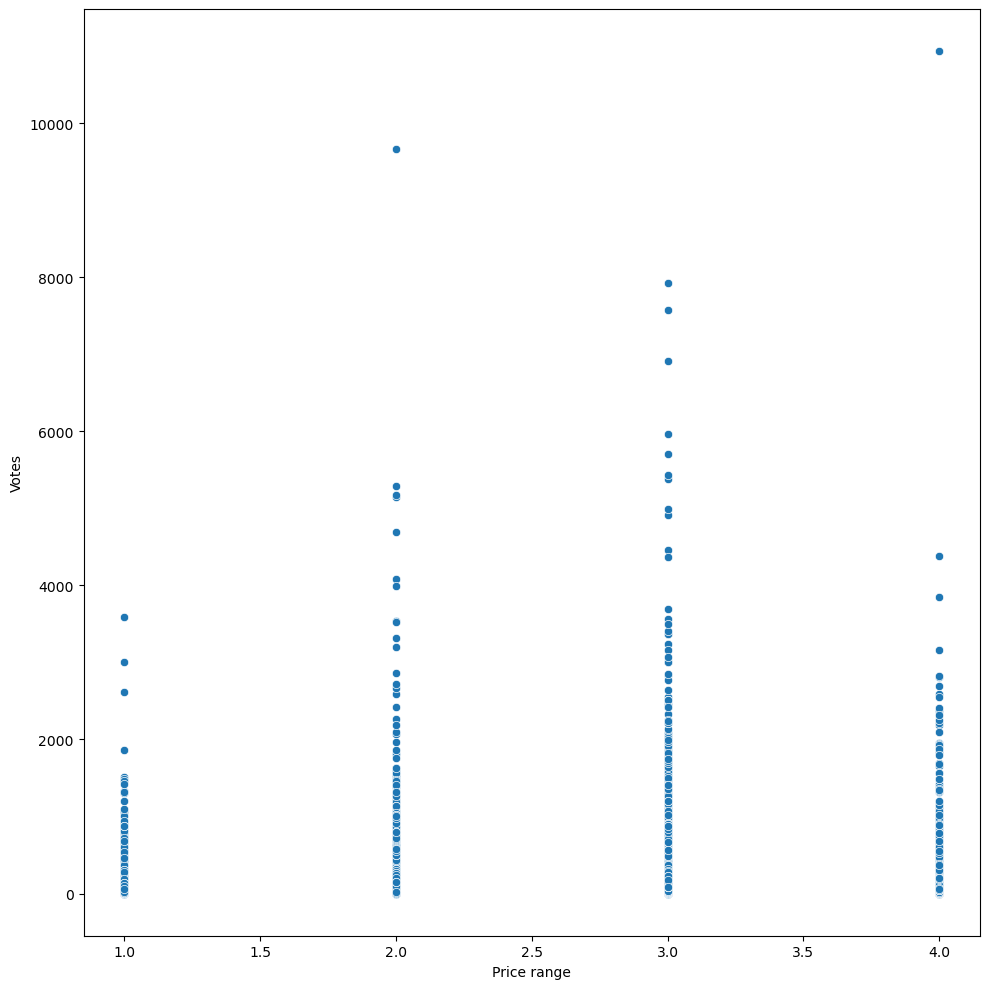

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(zomatorestdf,x='Price range',y='Votes')
plt.tight_layout()

In [109]:
# Drop the columns that are not important for prediction of target or label
zomatorestdf=zomatorestdf.drop(columns=['Country','Restaurant Name','City','Address','Switch to order menu','Locality','Locality Verbose'],axis=1)

In [111]:
zomatorestdf.head()

,Country Code,Restaurant ID,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3400025,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,1,3400341,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,1,3400005,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
3,1,3400021,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87
4,1,3400017,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177


# Label Encoder for object type columns

In [113]:
columns_to_encode=['Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Rating color','Rating text']
le=LabelEncoder()
zomatorestdf[columns_to_encode]=zomatorestdf[columns_to_encode].apply(le.fit_transform)

In [115]:
zomatorestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Restaurant ID         9551 non-null   int64  
 2   Longitude             9551 non-null   float64
 3   Latitude              9551 non-null   float64
 4   Cuisines              9551 non-null   int32  
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   int32  
 7   Has Table booking     9551 non-null   int32  
 8   Has Online delivery   9551 non-null   int32  
 9   Is delivering now     9551 non-null   int32  
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating color          9551 non-null   int32  
 13  Rating text           9551 non-null   int32  
 14  Votes                 9551 non-null   int64  
dtypes: float64(3), int32(

In [117]:
zomatorestdf.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,989.461732,1199.210763,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,514.176108,16121.183073,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,1127.000000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,1353.500000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,1824.000000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000


# Seaborn heatmap to show correlation between each features in the dataset

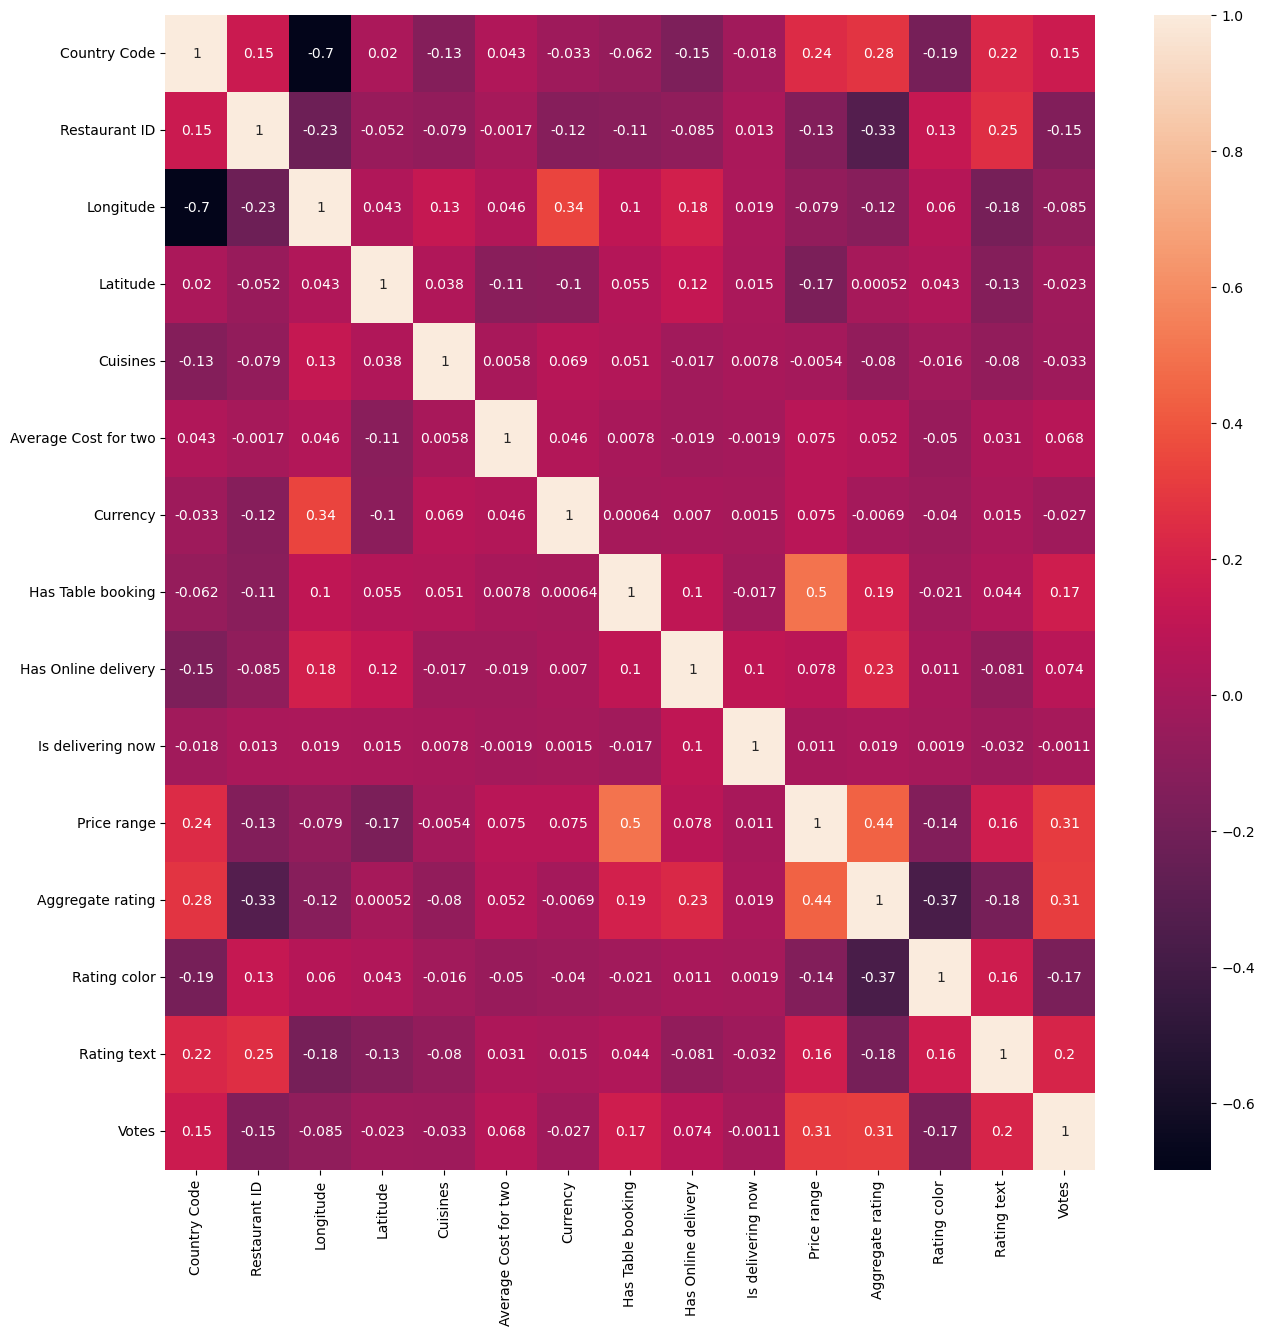

In [119]:
plt.figure(figsize=(15,15))
sns.heatmap(zomatorestdf.corr(),annot=True)
plt.show()

The output from the above heatmap shows that:

1, The columns Price range and Aggregate rating are positively correlated with each other.

2, The columns Restaurant ID and Longitude are negatively correlated with each other.

# Check for the skewness in the dataset using distplot

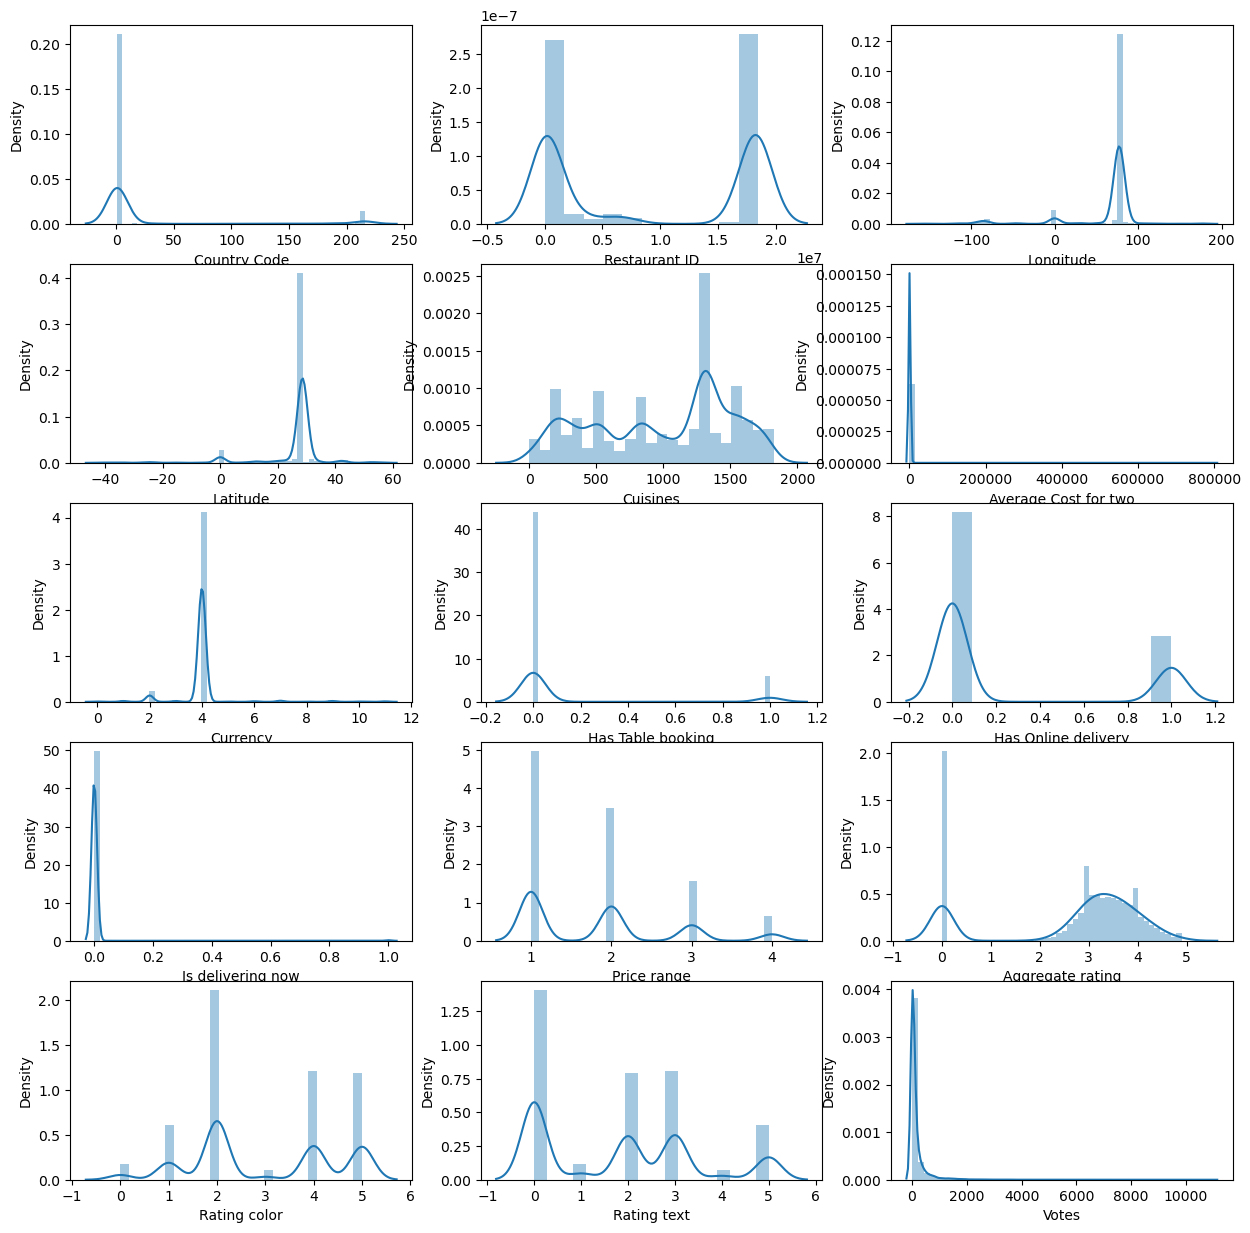

In [121]:
plt.figure(figsize=(15,15))
p=1
for i in zomatorestdf:
    if p<=15:
        plt.subplot(5,3,p)
        sns.distplot(zomatorestdf[i])
    p=p+1
plt.show()

# Check for the skewness in the dataset using pandas skew method

In [123]:
zomatorestdf.skew()

Country Code             3.043965
Restaurant ID            0.061570
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

In [125]:
zomatorestdf['Average Cost for two']=np.log1p(zomatorestdf['Average Cost for two'])

# Remove the skewness using powerTransformer

In [127]:
columns_skew=['Country Code','Longitude','Latitude','Currency','Has Table booking','Has Online delivery','Is delivering now','Aggregate rating','Votes']
pt=PowerTransformer()
zomatorestdf[columns_skew]=pt.fit_transform(zomatorestdf[columns_skew])

In [129]:
zomatorestdf.skew()

Country Code             2.780362
Restaurant ID            0.061570
Longitude               -0.803832
Latitude                -0.293200
Cuisines                -0.307425
Average Cost for two    -0.611041
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.610806
Rating color             0.046009
Rating text              0.431408
Votes                   -0.004029
dtype: float64

# Skewness is removed from the dataset

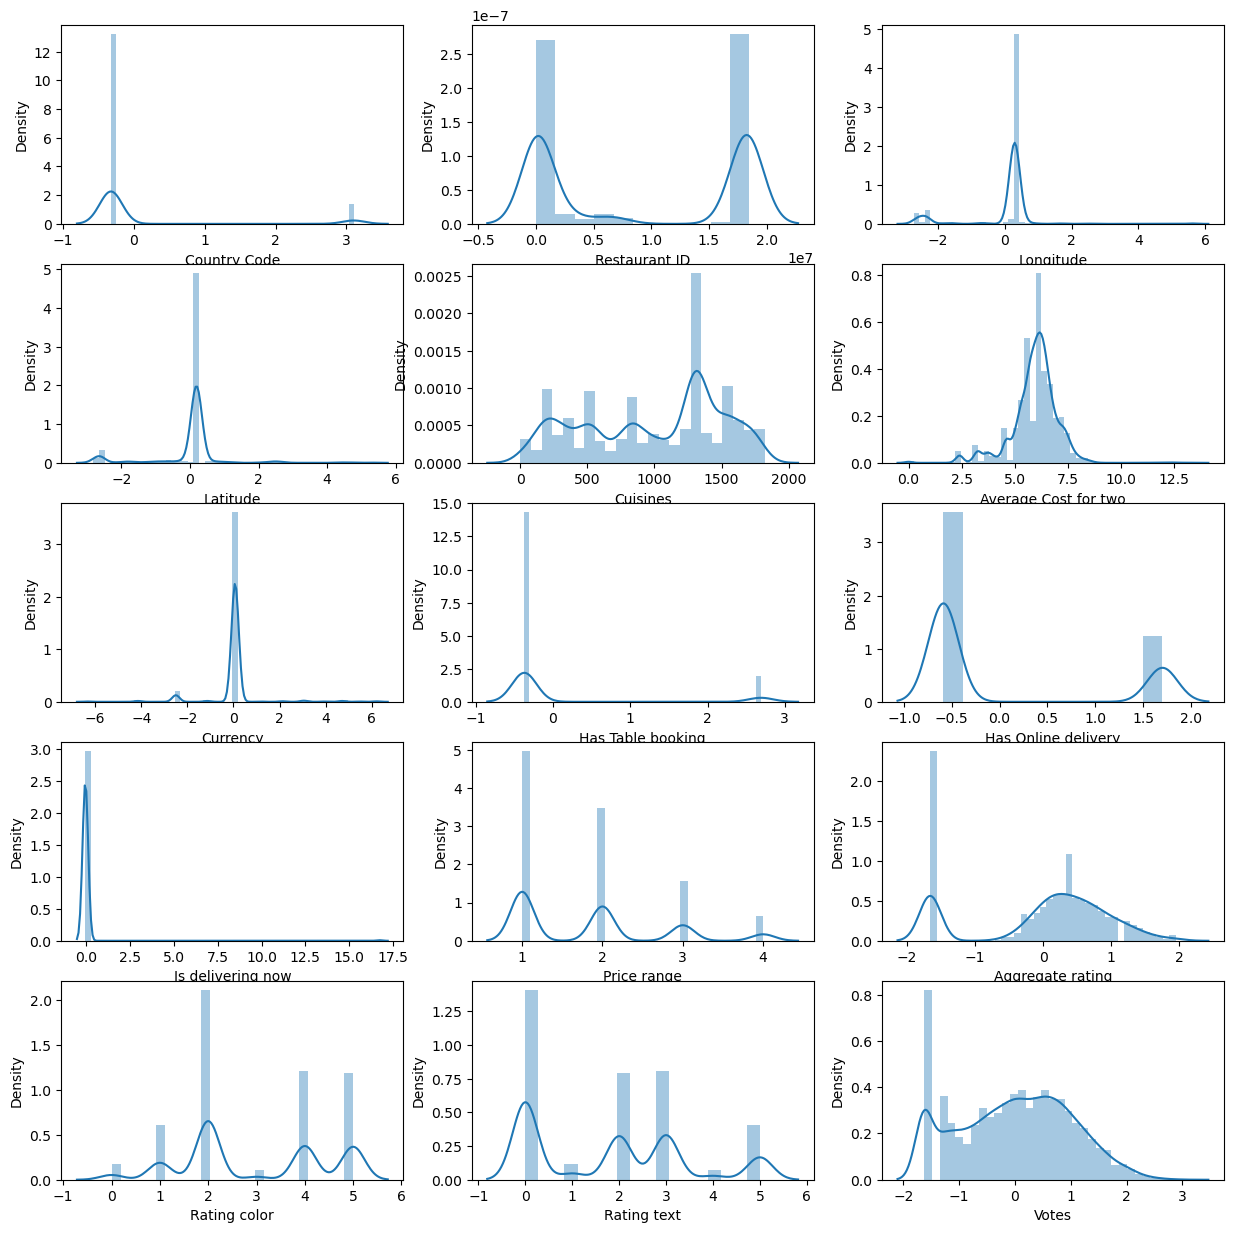

In [131]:
plt.figure(figsize=(15,15))
p=1
for i in zomatorestdf:
    if p<=15:
        plt.subplot(5,3,p)
        sns.distplot(zomatorestdf[i])
    p=p+1
plt.show()

# check for the outliers in the dataset using boxplot

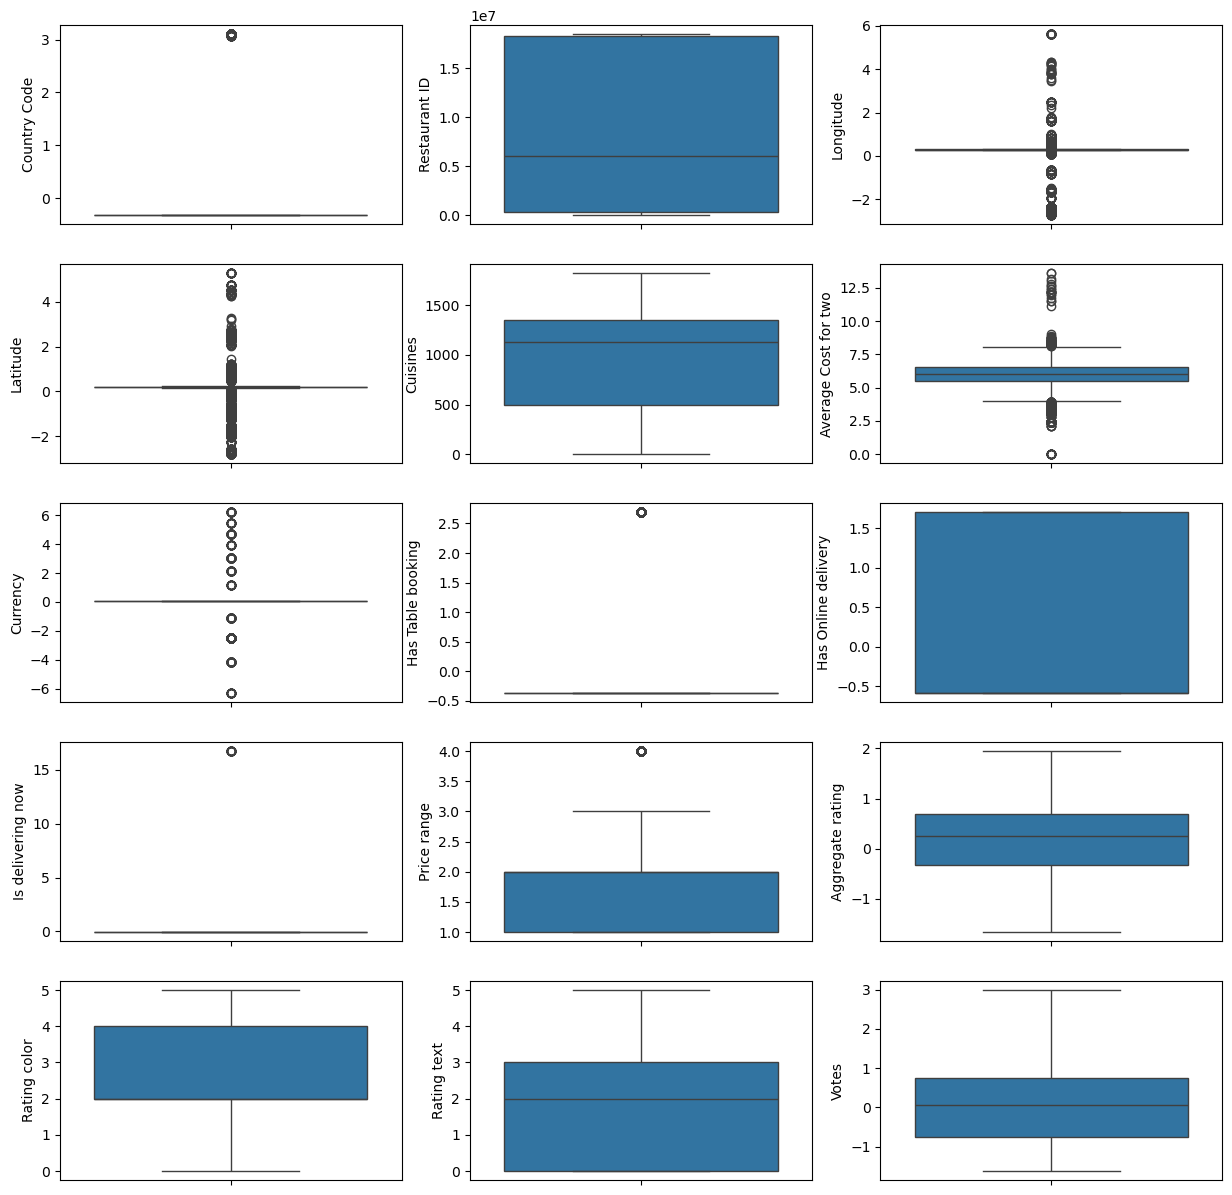

In [132]:
plt.figure(figsize=(15,15))
p=1
for i in zomatorestdf:
    if p<=15:
        plt.subplot(5,3,p)
        sns.boxplot(zomatorestdf[i])
    p=p+1
plt.show()

# Detect and remove outliers in the dataset using zscore

In [147]:
columns_outliers=['Country Code','Longitude','Average Cost for two','Votes']
z=np.abs(zscore(zomatorestdf[columns_outliers]))
z

,Country Code,Longitude,Average Cost for two,Votes
0,0.322345,0.331591,0.728727,0.791485
1,0.322345,2.357070,0.550320,0.458460
2,0.322345,0.331594,0.241265,0.595625
3,0.322345,0.330968,0.036416,0.557725
4,0.322345,0.331406,0.878094,0.907323
...,...,...,...,...
9546,3.103315,2.621704,3.272235,0.630847
9547,3.103315,2.621704,3.272235,0.360098
9548,3.103315,2.621680,2.480785,0.844893
9549,3.103315,2.598402,2.480785,0.844893


In [149]:
np.where(z>3)

(array([  10,   13,   15, ..., 9548, 9549, 9550], dtype=int64),
 array([2, 2, 2, ..., 0, 0, 0], dtype=int64))

In [159]:
zomatorest_df=zomatorestdf[(z<3).all(axis=1)]

In [161]:
zomatorest_df.shape

(8643, 15)

In [163]:
zomatorestdf.shape

(9551, 15)

In [254]:
print("Percentage of data loss",((zomatorestdf.shape[0]-zomatorest_df.shape[0])/zomatorestdf.shape[0])*100)

Percentage of data loss 9.506857920636582


# Outliers are removed from the dataset

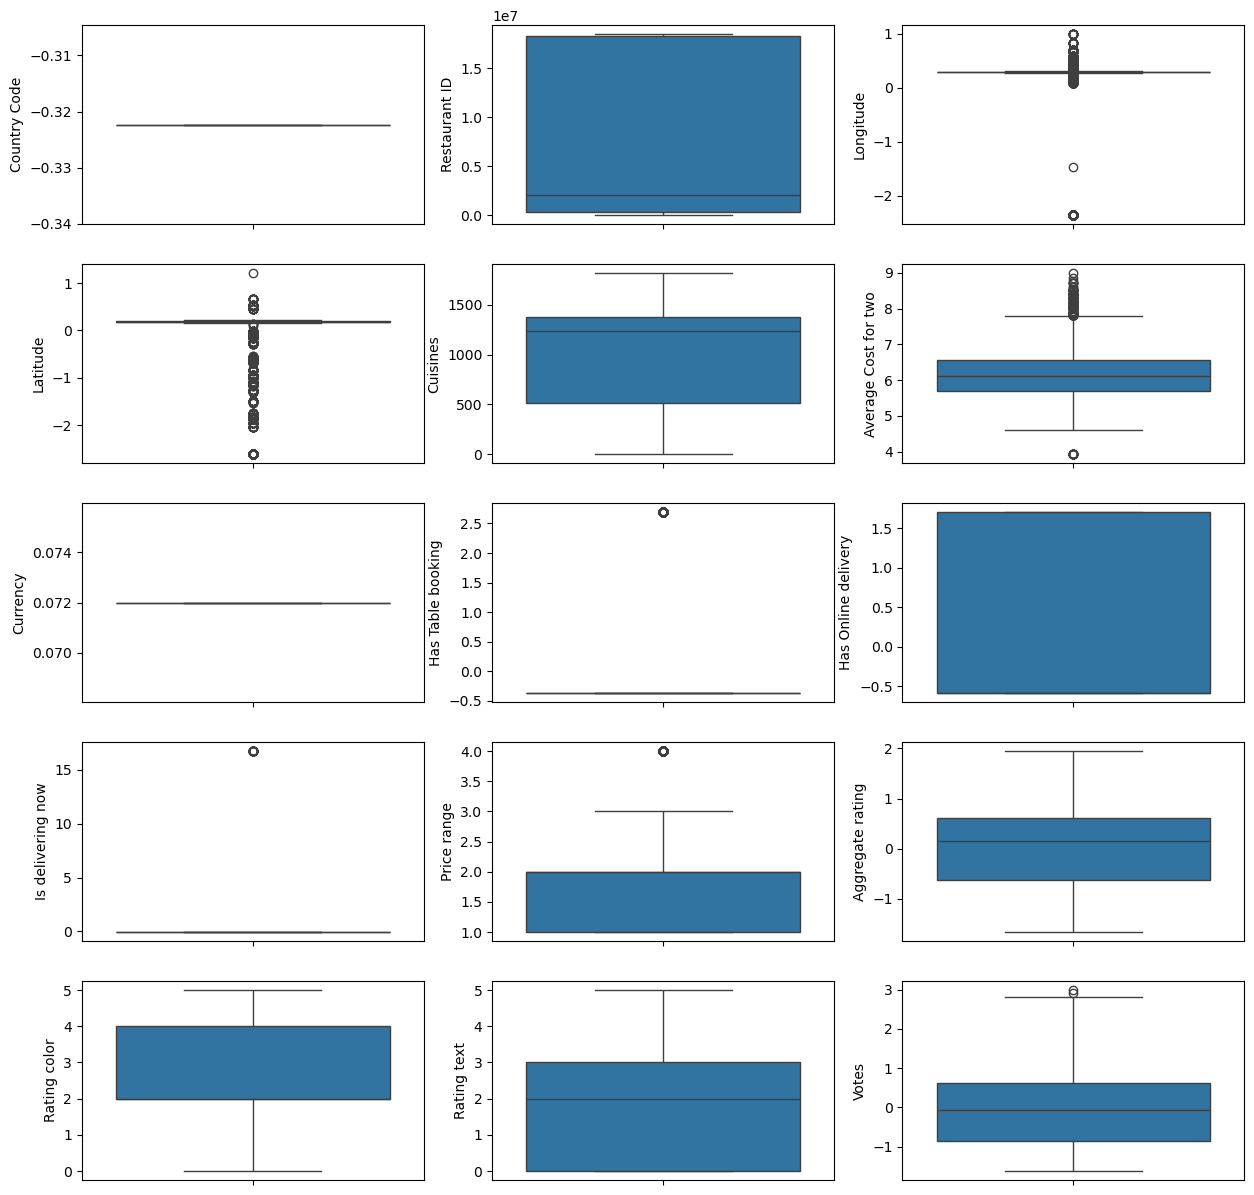

In [167]:
plt.figure(figsize=(15,15))
p=1
for i in zomatorest_df:
    if p<=15:
        plt.subplot(5,3,p)
        sns.boxplot(zomatorest_df[i])
    p=p+1
plt.show()

# Regression task

# Prediction of Average cost of food for two people in different currencies

# Split the input (x) and target/label (y)

In [169]:
x=zomatorest_df.drop(columns='Average Cost for two',axis=1)
y=zomatorest_df['Average Cost for two']

# Check for multicollinearity in the dataset using variance inflation factor

In [171]:
def calc_vif(x):
    df=pd.DataFrame()
    df["Columns"]=x.columns
    df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [173]:
calc_vif(x)

,Columns,VIF
0,Country Code,0.005509
1,Restaurant ID,1.554314
2,Longitude,5.275157
3,Latitude,5.354149
4,Cuisines,1.023885
5,Currency,0.000014
6,Has Table booking,1.561298
7,Has Online delivery,1.255957
8,Is delivering now,1.014096
9,Price range,1.980603


# Apply StandardScaler technique to the dataset

In [175]:
sc=StandardScaler()
x_scales=sc.fit_transform(x)
x_scaled=pd.DataFrame(x_scales,columns=x.columns)

In [177]:
x_scaled.head()

,Country Code,Restaurant ID,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-1.110223e-16,-0.586559,0.298865,0.025681,0.998351,1.387779e-17,-0.384062,-0.624139,-0.062844,1.498400,1.031626,1.393344,0.205785,0.903247
1,-1.110223e-16,-0.586524,-4.041366,-3.625548,0.998351,1.387779e-17,-0.384062,-0.624139,-0.062844,0.325544,0.641986,1.393344,0.205785,0.564217
2,-1.110223e-16,-0.586561,0.298870,0.025511,0.584031,1.387779e-17,-0.384062,-0.624139,-0.062844,0.325544,0.737019,1.393344,0.205785,0.703855
3,-1.110223e-16,-0.586560,0.297860,0.032715,1.259293,1.387779e-17,-0.384062,-0.624139,-0.062844,0.325544,1.132971,-1.462231,2.047625,0.665273
4,-1.110223e-16,-0.586560,0.298567,0.033906,0.717490,1.387779e-17,-0.384062,-0.624139,-0.062844,1.498400,1.340330,-1.462231,2.047625,1.021173


# Define the models for Regression task

In [183]:
lr=LinearRegression()
ls=Lasso(alpha=0.0001)
rg=Ridge(alpha=0.0001)
dtr=DecisionTreeRegressor()
svr=SVR()
lsvr=LinearSVR()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
bagr=BaggingRegressor()
etr=ExtraTreesRegressor()

models_dict1=[("LinearRegression",lr),
        ("Lasso",ls),
        ("Ridge",rg),
        ("DecisionTree Regressor",dtr),
        ("SupportVector Regressor",svr),
        ("KNeighbors Regressor",knr),
        ("RandomForest Regressor",rfr),
        ("AdaBoost Regressor",adr),
        ("GradientBoosting Regressor",gbr),
        ("Bagging Regressor",bagr),
        ("ExtraTrees Regressor",etr)]

# Perform cross validation to avoid overfitting and to get best performing model

In [185]:
models=[lr,ls,rg,dtr,svr,knr,rfr,adr,gbr,bagr,etr]

for i in models:
    cvs=cross_val_score(i,x_scaled,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"and mean of the cross validation is",np.mean(cvs))

Cross validation score for LinearRegression() is [0.81152802 0.81250203 0.73919549 0.80822644 0.75054566] and mean of the cross validation is 0.7843995282883158
Cross validation score for Lasso(alpha=0.0001) is [0.81163706 0.81253772 0.73912611 0.80821545 0.75049683] and mean of the cross validation is 0.7844026347859583
Cross validation score for Ridge(alpha=0.0001) is [0.81152802 0.81250203 0.73919549 0.80822644 0.75054567] and mean of the cross validation is 0.7843995286936511
Cross validation score for DecisionTreeRegressor() is [0.71205315 0.77281663 0.64325302 0.75310392 0.68240915] and mean of the cross validation is 0.7127271715501367
Cross validation score for SVR() is [0.82805904 0.82108938 0.75176337 0.81990653 0.76186872] and mean of the cross validation is 0.7965374080951859
Cross validation score for KNeighborsRegressor() is [0.80889532 0.818093   0.75635771 0.82256359 0.74893566] and mean of the cross validation is 0.7909690557163435
Cross validation score for RandomFore

# Get the best random state and maximum accuracy score

In [187]:
maxrs=0
maxacc=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    rfr.fit(x_train,y_train)
    y_pred=rfr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuarcy Score is",maxacc,"and random state is",maxrs)

Accuarcy Score is 0.8736975194836556 and random state is 143


# Train Test Split

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=143)

In [191]:
x_train.shape

(6050, 14)

In [193]:
x_test.shape

(2593, 14)

In [195]:
y_train.shape

(6050,)

In [197]:
y_test.shape

(2593,)

# Build and train the models for regression task

In [201]:
models_list=[]
for model_name,model_data in models_dict1:
    model_data.fit(x_train,y_train)
    y_pred=model_data.predict(x_test)
    r2=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    model1={"Model name":model_name,"R2_score":r2,"Mean Squared Error":mse,"Mean Absolute Error":mae,"Root Mean Squared Error":rmse}
    models_list.append(model1)
df1=pd.DataFrame(models_list)
df1=df1.sort_values(by="R2_score",ascending=False)
df1

,Model name,R2_score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
6,RandomForest Regressor,0.872943,0.071184,0.196499,0.266803
8,GradientBoosting Regressor,0.870278,0.072677,0.202636,0.269586
9,Bagging Regressor,0.861356,0.077675,0.204691,0.278703
10,ExtraTrees Regressor,0.856560,0.080362,0.204828,0.283482
4,SupportVector Regressor,0.827332,0.096737,0.225126,0.311026
5,KNeighbors Regressor,0.821106,0.100225,0.234168,0.316584
1,Lasso,0.812728,0.104920,0.247589,0.323913
2,Ridge,0.812714,0.104927,0.247624,0.323925
0,LinearRegression,0.812714,0.104927,0.247624,0.323925
7,AdaBoost Regressor,0.803158,0.110281,0.259320,0.332086


In [203]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("R-Score",r2_score(y_test,y_pred))
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

R-Score 0.8730565448047963
Mean Squared Error 0.07112017733993552
Mean Absolute Error 0.19533519312243816
Root Mean Squared Error 0.2666836653039243


# Hyperparameter tuning for Random Forest Regressor

In [205]:
param_grids={"criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],"max_features":["sqrt", "log2", None]}

In [207]:
param_grids

{'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_features': ['sqrt', 'log2', None]}

In [209]:
gscv=GridSearchCV(rfr,param_grids,n_jobs=-1,cv=5)

In [211]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None]})

In [213]:
gscv.best_params_

{'criterion': 'squared_error', 'max_features': None}

In [233]:
rfr1=RandomForestRegressor(criterion="squared_error",max_features=None)
rfr1.fit(x_train,y_train)
y_pred_rfr=rfr1.predict(x_test)
print("R-Score",r2_score(y_test,y_pred_rfr))
print("Mean Squared Error",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_rfr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred_rfr)))

R-Score 0.8724612696808315
Mean Squared Error 0.07145368072785993
Mean Absolute Error 0.19707729075363573
Root Mean Squared Error 0.26730821298242957


# Hyperparameter tuning for Gradient Boosting Regressor

In [219]:
grid_params1={"loss" : ['squared_error', 'absolute_error', 'huber', 'quantile'],"criterion" : ['friedman_mse', 'squared_error'],"max_features" : ['sqrt', 'log2'],"alpha":[0.0,0.1,0.01,0.001,0.0001,0.00001,0.000001,1.0]}

In [221]:
grid_params1

{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_features': ['sqrt', 'log2'],
 'alpha': [0.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1.0]}

In [223]:
gscv1=GridSearchCV(gbr,grid_params1,n_jobs=-1,cv=5)

In [225]:
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1.0],
                         'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2']})

In [227]:
gscv1.best_params_

{'alpha': 0.001,
 'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_features': 'log2'}

In [229]:
gbr1=GradientBoostingRegressor(loss="squared_error",criterion="friedman_mse",max_features="log2",alpha=0.001)
gbr1.fit(x_train,y_train)
y_pred_gbr=gbr1.predict(x_test)
print("R-Score",r2_score(y_test,y_pred_gbr))
print("Mean Squared Error",mean_squared_error(y_test,y_pred_gbr))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_gbr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

R-Score 0.853232874985348
Mean Squared Error 0.08222640499790741
Mean Absolute Error 0.21595613283437345
Root Mean Squared Error 0.28675146904228305


# Save the best model

In [235]:
import joblib as jb

jb.dump(rfr1,open("ZomatoAvgCost.obj","wb"))

# Load the model

In [239]:
import joblib as jb

model=jb.load(open("ZomatoAvgCost.obj","rb"))
model.predict(x_test)

array([5.98191938, 5.87420454, 5.47135089, ..., 6.43318438, 5.78208697,
       5.72027436])

# Create the dataframe for actual and predicted output

In [241]:
a=np.array(y_test)
df=pd.DataFrame()
df["Actual Output"]=a
df["Predicted Output"]=y_pred_rfr
df

,Actual Output,Predicted Output
0,5.525453,5.981919
1,5.993961,5.874205
2,5.993961,5.471351
3,6.685861,6.526126
4,5.707110,5.427706
...,...,...
2588,5.860786,5.820681
2589,6.111467,6.074267
2590,6.398595,6.433184
2591,5.707110,5.782087


# Seaborn lineplot to show the relationship between actual output and predicted output

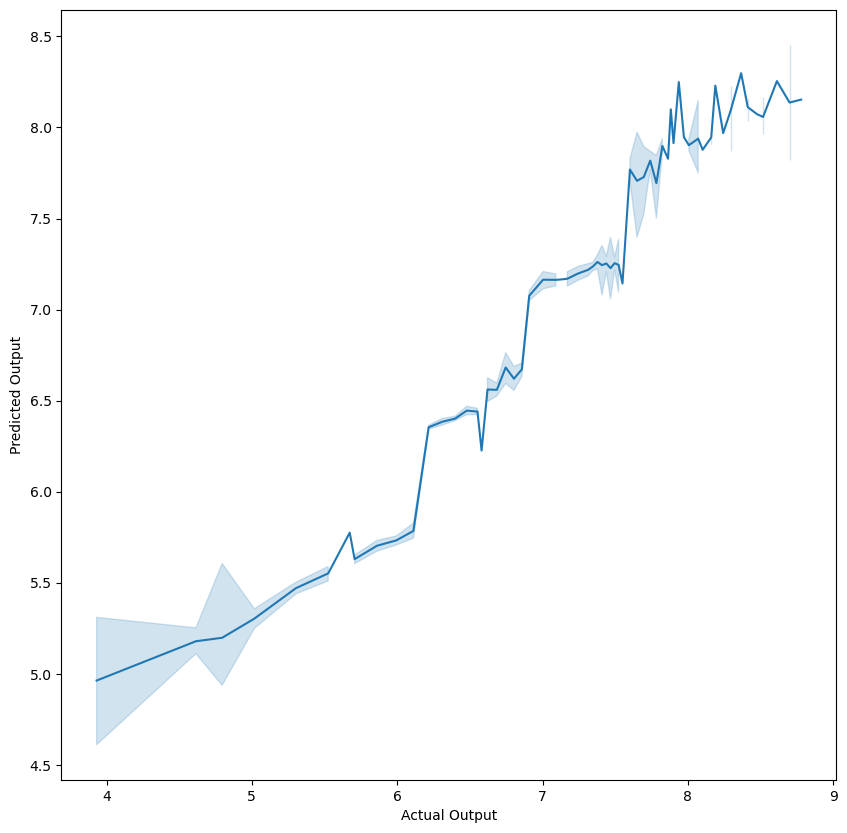

In [245]:
plt.figure(figsize=(10,10))
sns.lineplot(df,x='Actual Output',y='Predicted Output')
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The output from the lineplot shows the relationship between the actual output and predicted output. The increase in the value of actual output increases the value of predicted output shows that the RandomForestRegressor model perform well when compared to other regressor models.

# Classification problem

# Prediction of Price range

# Import the needed libraries for data preprocessing, model building and evaluation

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import FactorAnalysis
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,r2_score

In [256]:
zomatorest_df.head()

,Country Code,Restaurant ID,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.322345,3400025,0.331591,-0.019668,1514,6.746412,0.071996,-0.371446,-0.587547,-0.059771,3,0.892040,5,2,0.791485
1,-0.322345,3400341,-2.357070,-2.614712,1514,6.552508,0.071996,-0.371446,-0.587547,-0.059771,2,0.513034,5,2,0.458460
2,-0.322345,3400005,0.331594,-0.019789,1306,6.216606,0.071996,-0.371446,-0.587547,-0.059771,2,0.605473,5,2,0.595625
3,-0.322345,3400021,0.330968,-0.014668,1645,5.993961,0.071996,-0.371446,-0.587547,-0.059771,2,0.990620,1,5,0.557725
4,-0.322345,3400017,0.331406,-0.013822,1373,6.908755,0.071996,-0.371446,-0.587547,-0.059771,3,1.192320,1,5,0.907323


# Split the input (x) and target/label (y)

In [258]:
x=zomatorest_df.drop(columns='Price range',axis=1)
y=zomatorest_df['Price range']

# Check for multicollinearity in the dataset using variance inflation factor

In [260]:
def calc_vif(x):
    df=pd.DataFrame()
    df["Columns"]=x.columns
    df["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [262]:
calc_vif(x)

,Columns,VIF
0,Country Code,0.002097
1,Restaurant ID,1.574982
2,Longitude,5.249317
3,Latitude,5.296869
4,Cuisines,1.022322
5,Average Cost for two,1.957521
6,Currency,0.000412
7,Has Table booking,1.521525
8,Has Online delivery,1.253933
9,Is delivering now,1.014097


# Check for the counts of target or label

In [264]:
y.value_counts()

Price range
1    4286
2    2858
3    1111
4     388
Name: count, dtype: int64

The dataset is imbalanced. 

# Balance the dataset using SMOTE oversampling technique

In [266]:
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x,y)

In [268]:
y_balanced.value_counts()

Price range
3    4286
2    4286
4    4286
1    4286
Name: count, dtype: int64

# Apply StandardScaler technique to the dataset

In [270]:
sc=StandardScaler()
x_scales=sc.fit_transform(x_balanced)
x_scaled=pd.DataFrame(x_scales,columns=x_balanced.columns)

In [272]:
x_scaled.head()

,Country Code,Restaurant ID,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
0,-1.110223e-16,-0.453662,0.305761,0.083698,1.078760,0.032568,1.387779e-17,-0.727419,-0.650791,-0.064179,0.772684,1.479413,0.161455,0.516413
1,-1.110223e-16,-0.453626,-4.601605,-3.661954,1.078760,-0.188441,1.387779e-17,-0.727419,-0.650791,-0.064179,0.339304,1.479413,0.161455,0.169430
2,-1.110223e-16,-0.453665,0.305767,0.083523,0.624894,-0.571297,1.387779e-17,-0.727419,-0.650791,-0.064179,0.445005,1.479413,0.161455,0.312344
3,-1.110223e-16,-0.453663,0.304624,0.090915,1.364608,-0.825065,1.387779e-17,-0.727419,-0.650791,-0.064179,0.885406,-1.254559,2.059064,0.272856
4,-1.110223e-16,-0.453663,0.305424,0.092136,0.771091,0.217604,1.387779e-17,-0.727419,-0.650791,-0.064179,1.116042,-1.254559,2.059064,0.637107


# Define the models for classification task

In [292]:
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bag=BaggingClassifier()
extra=ExtraTreesClassifier()

models_dict=[("Logistic Regression",lg),
        ("DecisionTree Classifier",dtc),
        ("SupportVector Classifier",svc),
        ("KNeighbors Classifier",knn),
        ("Gaussian NB",gnb),
        ("RandomForest Classifier",rfc),
        ("AdaBoost Classifier",ada),
        ("GradientBoosting Classifier",gbc),
        ("Bagging Classifier",bag),
        ("ExtraTrees Classifier",extra)]

# Perform cross validation technique to avoid overfitting and to get best performing model

In [294]:
models=[dtc,svc,knn,gnb,rfc,ada,gbc,bag,extra]

for i in models:
    cvs=cross_val_score(i,x_scaled,y_balanced,scoring='accuracy',cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"and mean of the cross validation is",np.mean(cvs))

Cross validation score for DecisionTreeClassifier() is [0.98250219 0.9941674  0.99270924 0.98862642 0.98424737] and mean of the cross validation is 0.9884505247812518
Cross validation score for SVC() is [0.93234179 0.95888014 0.96208807 0.95975503 0.96411902] and mean of the cross validation is 0.9554368106748228
Cross validation score for KNeighborsClassifier() is [0.86351706 0.90376203 0.91455235 0.90522018 0.91336056] and mean of the cross validation is 0.9000824357282061
Cross validation score for GaussianNB() is [0.57684456 0.5018956  0.5858851  0.57421989 0.57351225] and mean of the cross validation is 0.5624714792797925
Cross validation score for RandomForestClassifier() is [0.97433654 0.99212598 0.99504229 0.9903762  0.99270712] and mean of the cross validation is 0.9889176265452232
Cross validation score for AdaBoostClassifier() is [0.71536891 0.72470108 0.7258676  0.50247886 0.72637106] and mean of the cross validation is 0.6789575019575296
Cross validation score for Gradient

# Get the best random state and maximum accuracy score

In [278]:
maxrs=0
maxacc=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_balanced,test_size=0.30,random_state=i)
    bag.fit(x_train,y_train)
    y_pred=bag.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuarcy Score is",maxacc,"and random state is",maxrs)

Accuarcy Score is 0.9959175738724728 and random state is 132


# Train-Test Split

In [296]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_balanced,test_size=0.30,random_state=132)

In [298]:
x_train.shape

(12000, 14)

In [300]:
x_test.shape

(5144, 14)

In [302]:
y_train.shape

(12000,)

In [304]:
y_test.shape

(5144,)

# Build and train the classification models

In [314]:
model_list=[]
for model_name,model_data in models_dict:
    model_data.fit(x_train,y_train)
    y_pred=model_data.predict(x_test)
    r2=r2_score(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    model={"Model name":model_name,"R2_score":r2,"Accuracy Score":accuracy}
    model_list.append(model)
df2=pd.DataFrame(model_list)
df2=df2.sort_values(by="Accuracy Score",ascending=False)
df2

,Model name,R2_score,Accuracy Score
8,Bagging Classifier,0.997051,0.996306
5,RandomForest Classifier,0.993482,0.991835
7,GradientBoosting Classifier,0.993482,0.991835
1,DecisionTree Classifier,0.993327,0.991641
9,ExtraTrees Classifier,0.989757,0.987170
2,SupportVector Classifier,0.966478,0.958593
0,Logistic Regression,0.954063,0.942457
3,KNeighbors Classifier,0.921783,0.905521
6,AdaBoost Classifier,0.775747,0.719090
4,Gaussian NB,0.480882,0.505832


# Hyperparameter tuning for Bagging Classifier

In [330]:
param_grids2={"max_features":[0.1,0.01,0.001,0.0001,0.00001,0.000001,1.0],"bootstrap":[True,False],"bootstrap_features":[True,False]}

In [332]:
param_grids2

{'max_features': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1.0],
 'bootstrap': [True, False],
 'bootstrap_features': [True, False]}

In [334]:
gscv2=GridSearchCV(bag,param_grids2,scoring='accuracy',n_jobs=-1,cv=5)

In [336]:
gscv2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.1, 0.01, 0.001, 0.0001, 1e-05,
                                          1e-06, 1.0]},
             scoring='accuracy')

In [338]:
gscv2.best_params_

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0}

# Hyperparameter tuning for Random Forest Classifier

In [340]:
param_grids3={"criterion":["gini", "entropy", "log_loss"],"max_features":["sqrt", "log2", None],"class_weight":["balanced", "balanced_subsample"]}

In [342]:
param_grids3

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'class_weight': ['balanced', 'balanced_subsample']}

In [348]:
gscv3=GridSearchCV(rfc,param_grids3,scoring='accuracy',n_jobs=-1,cv=5)

In [350]:
gscv3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [352]:
gscv3.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': None}

In [354]:
rfc2=RandomForestClassifier(criterion='entropy',max_features=None,class_weight='balanced_subsample')
rfc2.fit(x_train,y_train)
y_pred_rfc2=rfc2.predict(x_test)
print("R2 Score",r2_score(y_test,y_pred_rfc2))
print("Accuracy Score",accuracy_score(y_test,y_pred_rfc2))

R2 Score 0.9976721172992217
Accuracy Score 0.9970839813374806


# Hyperparameter tuning for Gradient Boosting Classifier

In [356]:
param_grids4={"loss" : ['log_loss', 'exponential'],"criterion" : ['friedman_mse', 'squared_error'],"max_features" : ['sqrt', 'log2']}

In [358]:
param_grids4

{'loss': ['log_loss', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_features': ['sqrt', 'log2']}

In [360]:
gscv4=GridSearchCV(gbc,param_grids4,scoring='accuracy',n_jobs=-1,cv=5)

In [362]:
gscv4.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [364]:
gscv4.best_params_

{'criterion': 'squared_error', 'loss': 'log_loss', 'max_features': 'sqrt'}

In [366]:
gbc2=GradientBoostingClassifier(criterion='squared_error',max_features='sqrt',loss='log_loss')
gbc2.fit(x_train,y_train)
y_pred_gbc2=gbc2.predict(x_test)
print("R2 Score",r2_score(y_test,y_pred_gbc2))
print("Accuracy Score",accuracy_score(y_test,y_pred_gbc2))

R2 Score 0.9902228926567308
Accuracy Score 0.9877527216174183


# Save the best model

In [368]:
import pickle

pickle.dump(rfc2,open("ZomatoPricerange.pkl","wb"))

# Load the model

In [370]:
import pickle

model=pickle.load(open("ZomatoPricerange.pkl","rb"))
model.predict(x_test)

array([1, 4, 4, ..., 1, 3, 2], dtype=int64)

# Create a dataframe for actual and predicted output

In [372]:
b=np.array(y_test)
df4=pd.DataFrame()
df4["Actual Output"]=b
df4["Predicted Output"]=y_pred_rfc2
df4

,Actual Output,Predicted Output
0,1,1
1,4,4
2,4,4
3,1,1
4,3,3
...,...,...
5139,3,3
5140,2,2
5141,1,1
5142,3,3


# Lineplot to show the relationship between the actual output and predicted output

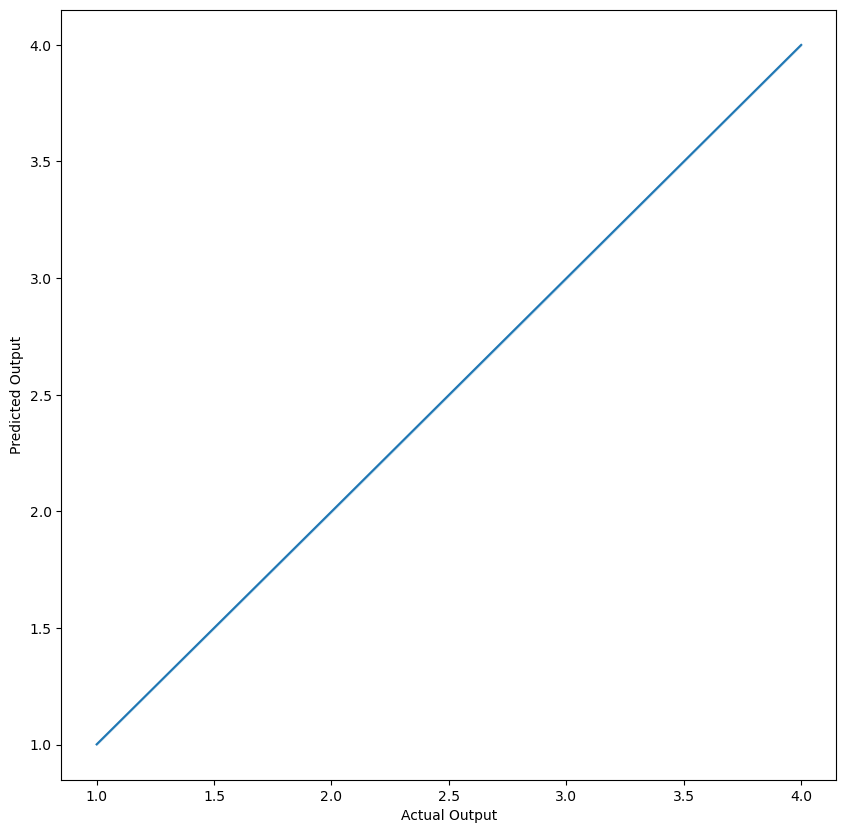

In [374]:
plt.figure(figsize=(10,10))
sns.lineplot(df4,x='Actual Output',y='Predicted Output')
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The output from the lineplot shows the relationship between the actual output and predicted output. The increase in the value of actual output increases the value of predicted output shows that the RandomForestClassifier model perform well when compared to other classifier models.